In [ ]:
import pandas as pd

In [45]:
#read in the text
dataText = pd.read_csv("Text.csv")

print(dataText)
print(len(dataText))

                                           sentence_text
0      The lead dancer of the group , Chandrakala ( S...
1      In 2001 , Japanese singer and voice actress Ri...
2      But Amritlal rejects the proposal saying Prasa...
3      Art director Johnny Taylor was inspired by his...
4      His Person Representative recorded on his Deta...
...                                                  ...
17847  The minister of war receives Salvator Waltz - ...
17848  Luisah Teish is a teacher One author said she ...
17849  This article draws on that evidence base and t...
17850  A bold and deserving editor who is not afraid ...
17851  French justice concluded that the anti - terro...

[17852 rows x 1 columns]
17852


In [3]:
dataLabels = pd.read_csv("TextLabels.csv")
print(dataLabels)

      predicted_gender
0               female
1               female
2                 male
3                 male
4                 male
...                ...
17847             male
17848           female
17849           female
17850             male
17851             male

[17852 rows x 1 columns]


In [4]:
GenderData = pd.concat([dataText,dataLabels], axis =1, join="inner")

GenderData

,sentence_text,predicted_gender
0,"The lead dancer of the group , Chandrakala ( S...",female
1,"In 2001 , Japanese singer and voice actress Ri...",female
2,But Amritlal rejects the proposal saying Prasa...,male
3,Art director Johnny Taylor was inspired by his...,male
4,His Person Representative recorded on his Deta...,male
...,...,...
17847,The minister of war receives Salvator Waltz - ...,male
17848,Luisah Teish is a teacher One author said she ...,female
17849,This article draws on that evidence base and t...,female
17850,A bold and deserving editor who is not afraid ...,male


                                           sentence_text predicted_gender  \
0      The lead dancer of the group , Chandrakala ( S...           female   
1      In 2001 , Japanese singer and voice actress Ri...           female   
2      But Amritlal rejects the proposal saying Prasa...             male   
3      Art director Johnny Taylor was inspired by his...             male   
4      His Person Representative recorded on his Deta...             male   
...                                                  ...              ...   
17847  The minister of war receives Salvator Waltz - ...             male   
17848  Luisah Teish is a teacher One author said she ...           female   
17849  This article draws on that evidence base and t...           female   
17850  A bold and deserving editor who is not afraid ...             male   
17851  French justice concluded that the anti - terro...             male   

       target  
0           0  
1           0  
2           1  
3          

<AxesSubplot:>

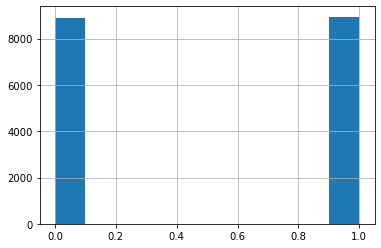

In [5]:
#encoding from target labels
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
GenderData["target"] = LE.fit_transform(GenderData['predicted_gender'])
print(GenderData)

#make sure we have an even distribution of female and male
GenderData["target"].hist()

In [6]:
import numpy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(GenderData.sentence_text, GenderData.target, test_size=0.40, random_state=42)

In [7]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(pd.DataFrame(y_train))


10711
10711
7141
7141
       target
7348        1
3333        1
14676       1
9976        0
13483       0
...       ...
11284       1
11964       0
5390        0
860         1
15795       0

[10711 rows x 1 columns]


In [8]:
print((y_train))

7348     1
3333     1
14676    1
9976     0
13483    0
        ..
11284    1
11964    0
5390     0
860      1
15795    0
Name: target, Length: 10711, dtype: int64


In [9]:
import re
import nltk
import string
import itertools
from gensim.models import Word2Vec
from nltk.corpus import stopwords

#preprocess that text blood

def pre_process(data):
    newData = []
    data = [re.sub(r'\[[0-9]*\]',' ', elem) for elem in data] #remove numbers
    data = [re.sub(r'\s+',' ',elem) for elem in data] #remove whitespace
    data = [re.sub(r'[^\w\s]', ' ', elem) for elem in data] #remove punctuation
    data = [re.sub(r'[\d+]', ' ', elem) for elem in data] #remove digits

    data_sent = [nltk.sent_tokenize(elem) for elem in data] #tokenize data into sentences


    data_sent = list(itertools.chain.from_iterable(data_sent))

    data_sent_words = [nltk.word_tokenize(str(sentence)) for sentence in data_sent] #tokenize sentences as words

    for i in range(len(data_sent_words)): #loop through words
        #remove stopwords
        data_sent_words[i] = [word for word in data_sent_words[i] if word not in stopwords.words('english')]
        data_sent_words[i] = [elem.lower() for elem in data_sent_words[i]] #convert to lowercase
        data_sent_words[i] = [word for word in data_sent_words[i] if len(word)>3] #remove words smaller than 3

    data = data_sent_words
    return data
    
X_train = pre_process(X_train) #preprocess X_train
X_test = pre_process(X_test) #preprocess X_test
X_train1 = X_train
X_test1 = X_test

In [10]:
print(len(X_train1))
print(X_train1)


10711
[['case', 'person', 'understands', 'message', 'tongues', 'previously', 'spoken', 'unknown', 'language'], ['enrolled', 'self', 'help', 'student', 'meant', 'worked', 'school'], ['experienced', 'techniques', 'gray', 'agent', 'seemingly', 'severs', 'hands', 'illusion'], ['author', 'makes', 'actuarial', 'evaluation', 'study', 'clinical', 'work', 'patients', 'effect', 'anticonvulsivant', 'drugs', 'used', 'many', 'kinds', 'electroencephalographic', 'changes'], ['better', 'person', 'environment', 'lead', 'lower', 'perceived', 'stress'], ['other', 'prominent', 'topchubashis', 'mustafa', 'topchubashev', 'famous', 'surgeon', 'ibrahim', 'topchubashev', 'doctor', 'also', 'composer'], ['kenny', 'turned', 'zombie', 'mortician', 'accidentally', 'knocks', 'worcestershire', 'sauce', 'fermented', 'liquid', 'condiment', 'embalming', 'fluid'], ['during', 'later', 'time', 'soap', 'producer', 'produced', 'high', 'profile', 'storylines', 'mitzeee', 'mercedes', 'feud', 'lynsey', 'nolan', 'karen', 'hassan

In [11]:
X_train1_joined = []

for sentence in X_train1: #loop through the sentences in X_train
    X_train1_joined.append(' '.join(sentence)) #join each sentence back together with a whitespace
    
X_test1_joined = []

for sentence1 in X_test1: #loop through the sentences in X_test
    X_test1_joined.append(' '.join(sentence1)) #join each sentence back together with a whitespace
    


In [12]:
X_train1_df = pd.DataFrame(X_train1_joined) #convert joined sentences into dataframe
X_test1_df = pd.DataFrame(X_test1_joined) #convert joined sentences into dataframe


print(X_train1_df)
print(X_test1_df)

                                                       0
0      case person understands message tongues previo...
1         enrolled self help student meant worked school
2      experienced techniques gray agent seemingly se...
3      author makes actuarial evaluation study clinic...
4      better person environment lead lower perceived...
...                                                  ...
10706  series also featured back stories involving ph...
10707  doctor comes wakes patient dying sleeping warn...
10708  change prompted qualified female electronics t...
10709  subsequently sentenced life prison robbed equi...
10710  dancer julia rourke wins first world title cou...

[10711 rows x 1 columns]
                                                      0
0     elderly farmer played victor rebengiuc lost wi...
1     danys also asked include soviet ideas movie sc...
2     condie years born third marriage point laurenc...
3     sitting news desk turns correspondent seems la...
4     reas

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

#create vectorizer
vectorizer = CountVectorizer(stop_words='english')

#converting xtrain to numeric values
v = vectorizer.fit(X_train1_df[0].values)

#get the vocabulary from the xtrain so we can use it to show feature 
temp = v.vocabulary_

#converting xtrain to numeric values
X_train1_vec = vectorizer.fit_transform(X_train1_joined)
#print("Vocabulary: ", temp)

print(type(temp))
keys = list(temp.keys()) #get the keys from the vocabulary because those are the features


print("Encoded doc is: ")
print(X_train1_vec.toarray()) #show feature count

#create dataframe of vectorized data
countVectorized_X_train1 = pd.DataFrame(X_train1_vec.toarray(), columns=keys)  

countVectorized_X_train1

<class 'dict'>
Encoded doc is: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,case,person,understands,message,tongues,previously,spoken,unknown,language,enrolled,...,nabieva,kiryashov,ulrich,renews,phantom,barr,mishkin,silicon,electronics,barred
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#create vectorizer
vectorizer1 = CountVectorizer(stop_words='english')


#converting xtest to numeric values, using temp fit so we can get the vocabulary
v1 = vectorizer1.fit(X_test1_df[0].values)

#converting xtest to numeric values
X_test1_vec = vectorizer1.transform(X_test1_joined)

#get the vocabulary from the xtest so we can use it to show feature 
temp1 = v1.vocabulary_
#print("Vocabulary: ", temp)

print(type(temp1))
keys1 = list(temp1.keys()) #get the keys from the vocabulary because those are the features

print("Encoded doc is: ")
print(X_test1_vec.toarray()) #show feature count

#create dataframe of vectorized data
countVectorized_X_test1 = pd.DataFrame(X_test1_vec.toarray(), columns=keys1)

countVectorized_X_test1

<class 'dict'>
Encoded doc is: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,elderly,farmer,played,victor,rebengiuc,lost,wife,flood,danys,asked,...,abiyev,outpost,gangi,reddy,indu,mingles,fragments,lilith,larita,certificates
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import gensim
from gensim import models
import warnings
#warnings.filterwarnings('ignore')

#import google's pretrained w2vec model
googleNewsWE = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)


In [16]:
#get complete dimensions of word embeddings matrix
googleNewsWE.vectors.shape


(3000000, 300)

In [17]:
#look at a sample vector for my name
googleNewsWE['jonas']

array([-1.25976562e-01,  4.00390625e-02,  1.24511719e-01,  2.01171875e-01,
       -1.72119141e-02,  8.93554688e-02,  8.39843750e-02, -1.86523438e-01,
        9.66796875e-02,  2.33154297e-02, -7.95898438e-02, -1.22558594e-01,
       -9.86328125e-02,  9.61914062e-02, -8.69140625e-02,  1.31835938e-01,
        9.96093750e-02,  1.05957031e-01, -8.98437500e-02,  2.50244141e-02,
        2.20947266e-02, -3.08837891e-02,  3.84765625e-01, -5.85937500e-02,
       -1.01562500e-01,  3.03955078e-02, -9.22851562e-02,  9.47265625e-02,
        5.54199219e-02, -1.35742188e-01, -1.85546875e-02,  1.13769531e-01,
       -1.20849609e-02, -5.81054688e-02, -1.27929688e-01,  2.44140625e-02,
        3.51562500e-02,  1.63085938e-01,  1.24511719e-01,  2.92968750e-02,
       -1.36718750e-02, -1.08886719e-01,  1.51367188e-01,  6.20117188e-02,
        1.34765625e-01, -1.28906250e-01,  6.15234375e-02, -9.27734375e-02,
       -1.00097656e-01,  4.00390625e-02, -2.02148438e-01,  1.82617188e-01,
        2.49023438e-02,  

In [18]:
googleNewsWE.most_similar('Melee', topn=5) #get the 5 most similar words to melee

[('Brawl', 0.629210889339447),
 ('Super_Smash', 0.5440996289253235),
 ('Firefight', 0.5250779390335083),
 ('Skirmish', 0.5244910717010498),
 ('Online_Multiplayer', 0.5168028473854065)]

In [19]:
#create the list of words which are present in the doc term matrix
wordsVocab = countVectorized_X_train1.columns

#print sample words as sanity check
print(wordsVocab[0:10])

#create the list of words which are present in the doc term matrix
wordsVocab1 = countVectorized_X_test1.columns

#print sample words as sanity check
print(wordsVocab1[0:10])

Index(['case', 'person', 'understands', 'message', 'tongues', 'previously',
       'spoken', 'unknown', 'language', 'enrolled'],
      dtype='object')
Index(['elderly', 'farmer', 'played', 'victor', 'rebengiuc', 'lost', 'wife',
       'flood', 'danys', 'asked'],
      dtype='object')


In [20]:
import numpy as np
#convert every sentence into a numeric vector


def text2Vect(text):
    
    #transform input into numeric
    conv = vectorizer.transform(text) 
    
    #create dataframe to hold transformed input
    countVecText = pd.DataFrame(conv.toarray(), columns=vectorizer.get_feature_names()) 
    
    #dataframe to hold sentences
    sent_dataFrame = pd.DataFrame()
    
    #loop through input
    for i in range(countVecText.shape[0]):
        
        #init sentence with all zeros
        sentence = np.zeros(300)
        
        #loop through the vocabulary
        for word in wordsVocab[countVecText.iloc[i,:].values>=1]:
            
            #if a word is in the google news corpus add it to the sentence
            if word in googleNewsWE.key_to_index.keys():
                sentence = sentence + googleNewsWE[word]
        
        #append sentence to dataframe
        sent_dataFrame = sent_dataFrame.append(pd.DataFrame([sentence]))
        
    return sent_dataFrame

def text2Vect1(text1):
    
    #transform input into numeric
    conv1 = vectorizer1.transform(text1)
    
    #create dataframe to hold transformed input
    countVecText1 = pd.DataFrame(conv1.toarray(), columns=vectorizer1.get_feature_names())
    
    #dataframe to hold sentences
    sent_dataFrame1 = pd.DataFrame()
    
    #loop through input
    for i in range(countVecText1.shape[0]):
        
        #init sentence with all zeros
        sentence1 = np.zeros(300)
        
        #loop through the vocabulary
        for word in wordsVocab1[countVecText1.iloc[i,:].values>=1]:
            
            #if a word is in the google news corpus add it to the sentence
            if word in googleNewsWE.key_to_index.keys():
                sentence1 = sentence1 + googleNewsWE[word]
        
        #append sentence to dataframe
        sent_dataFrame1 = sent_dataFrame1.append(pd.DataFrame([sentence1]))
        
    return sent_dataFrame1
    
    

In [21]:
import warnings
warnings.filterwarnings('ignore')

#call functions
sent_dataFrame_X_train1 = text2Vect(X_train1_df[0])
sent_dataFrame_X_test1 = text2Vect1(X_test1_df[0])

In [24]:
#check shape
print(sent_dataFrame_X_train1.shape)
print(sent_dataFrame_X_test1.shape)

(10711, 300)
(7141, 300)


In [44]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

cv = CountVectorizer(stop_words='english',max_features=100)


g_nb = GaussianNB() #classifier for Gaussian Naive Bayes
naiveBayes = g_nb.fit(sent_dataFrame_X_train1, y_train) #training model
y_pred = naiveBayes.predict(sent_dataFrame_X_test1) #prediction model

#Classification report for Naive Bayes
target_names = ['female', 'male']
print("Naive Bayes")
print(classification_report(y_test, y_pred, target_names = target_names))

Naive Bayes
              precision    recall  f1-score   support

      female       0.53      0.60      0.56      3628
        male       0.52      0.44      0.48      3513

    accuracy                           0.52      7141
   macro avg       0.52      0.52      0.52      7141
weighted avg       0.52      0.52      0.52      7141



In [27]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) #classifier for KNN 
knn.fit(sent_dataFrame_X_train1, y_train) #training model
y_pred = knn.predict(sent_dataFrame_X_test1) #prediction model

#Classification report for kNN
target_names = ['female', 'male']
print("K-Nearest Neighbors 5")
print(classification_report(y_test, y_pred, target_names = target_names))

K-Nearest Neighbors 5
              precision    recall  f1-score   support

      female       0.53      0.56      0.54      3628
        male       0.51      0.48      0.50      3513

    accuracy                           0.52      7141
   macro avg       0.52      0.52      0.52      7141
weighted avg       0.52      0.52      0.52      7141



In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lgTrain = LogisticRegression() #classifier for Logistic Regression
lgModel = lgTrain.fit(sent_dataFrame_X_train1, y_train)   #training model
y_pred = lgModel.predict(sent_dataFrame_X_test1) #predictive model 

#Classification report for Logistic Regression
target_names = ['female', 'male']
print("Logistic Regression")
print(classification_report(y_test, y_pred, target_names = target_names))

Logistic Regression
              precision    recall  f1-score   support

      female       0.52      0.45      0.48      3628
        male       0.50      0.57      0.53      3513

    accuracy                           0.51      7141
   macro avg       0.51      0.51      0.51      7141
weighted avg       0.51      0.51      0.51      7141



In [29]:
#MLP
from sklearn.neural_network import MLPClassifier

mlpTrain = MLPClassifier(alpha=1e-1, hidden_layer_sizes=(100, 50)) #classifier for MLP
mlpModel = mlpTrain.fit(sent_dataFrame_X_train1, y_train)   #training model
y_pred = mlpModel.predict(sent_dataFrame_X_test1) #predictive model

#Classification report for MLP
target_names = ['female', 'male']
print("MLP")
print(classification_report(y_test, y_pred, target_names = target_names))

MLP
              precision    recall  f1-score   support

      female       0.52      0.48      0.50      3628
        male       0.50      0.55      0.52      3513

    accuracy                           0.51      7141
   macro avg       0.51      0.51      0.51      7141
weighted avg       0.51      0.51      0.51      7141



In [30]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
seed = 32 #set seed to 32 cause it seems to give the highest f1 score

tree = DecisionTreeClassifier(criterion='gini', random_state=seed) #classifier for Decision Tree
tree.fit(sent_dataFrame_X_train1, y_train) #training model
y_pred = tree.predict(sent_dataFrame_X_test1) #prediction model

#Classification report for Decision Tree
target_names = ['female', 'male']
print("Decision Tree")
print(classification_report(y_test, y_pred, target_names = target_names))

Decision Tree
              precision    recall  f1-score   support

      female       0.50      0.49      0.50      3628
        male       0.49      0.51      0.50      3513

    accuracy                           0.50      7141
   macro avg       0.50      0.50      0.50      7141
weighted avg       0.50      0.50      0.50      7141



In [31]:
#Selected model is K-Nearest Neighbors due to it having the highest rating accuracy

def predictMaleOrFemale(text2Predict):
    
    pre_process(text2Predict) #preprocess text2Predict
    temp2 = text2Vect(text2Predict) #turn text2Predict into a numeric

    predict = knn.predict(temp2) #apply KNN model on text2Predict
    
    #create dataframe that holds the text and prediction
    prediction = pd.DataFrame(text2Predict, columns=["Text To Predict"]) 
    prediction['Prediction'] = predict
    return(prediction)

In [32]:
predictionInput1 = ["jenny likes to dance"]

predictionInput1_Df = predictMaleOrFemale(predictionInput1)
predictionInput1_Df

,Text To Predict,Prediction
0,jenny likes to dance,0


In [33]:
predictionInput2 = ["Jack is the president of our club"]

predictionInput2_Df = predictMaleOrFemale(predictionInput2)
predictionInput2_Df

,Text To Predict,Prediction
0,Jack is the president of our club,1


In [34]:
predictionInput3 = ["How many times do we have to teach you this lesson old man??"]

predictionInput3_Df = predictMaleOrFemale(predictionInput3)
predictionInput3_Df

,Text To Predict,Prediction
0,How many times do we have to teach you this le...,0


In [35]:
predictionInput4 = ["Barbara continues to do her hair"]

predictionInput4_Df = predictMaleOrFemale(predictionInput4)
predictionInput4_Df

,Text To Predict,Prediction
0,Barbara continues to do her hair,0


In [36]:
predictionInput5 = ["Tommy wants to go to the barbershop!!"]

predictionInput5_Df = predictMaleOrFemale(predictionInput5)
predictionInput5_Df

,Text To Predict,Prediction
0,Tommy wants to go to the barbershop!!,0


In [37]:
predictionInput6 = ["Video games are for boys"]

predictionInput6_Df = predictMaleOrFemale(predictionInput6)
predictionInput6_Df

,Text To Predict,Prediction
0,Video games are for boys,1


In [38]:
predictionInput7 = ["Video games are for girls"]

predictionInput7_Df = predictMaleOrFemale(predictionInput7)
predictionInput7_Df

,Text To Predict,Prediction
0,Video games are for girls,1


In [46]:


frames = [predictionInput1_Df, predictionInput2_Df, predictionInput3_Df, predictionInput4_Df, predictionInput5_Df, predictionInput6_Df, predictionInput7_Df]

predictionDf = pd.concat(frames, axis =0, join="inner")

predictionDf

,Text To Predict,Prediction
0,jenny likes to dance,0
0,Jack is the president of our club,1
0,How many times do we have to teach you this le...,0
0,Barbara continues to do her hair,0
0,Tommy wants to go to the barbershop!!,0
0,Video games are for boys,1
0,Video games are for girls,1


In [68]:
finalData = pd.read_csv("Test.csv")

print(finalData)
print(len(finalData))

                                          sentence_text
0     The artist accompanying Ottheinrich can only h...
1     Her father Thomas Austin was an architect , an...
2     The singer explained that she made this partic...
3     His former psychologist lost her professional ...
4     In addition , other real - life people make ap...
...                                                 ...
7647  When Reba McEntire made her Grand Ole Opry deb...
7648  The author uses her knowledge of Hebrew and Gr...
7649  In his commentary , Brahmagupta added , " a pe...
7650  In the same year , a New York Times science wr...
7651  When the matter went to court , Marie 's own s...

[7652 rows x 1 columns]
7652


In [92]:
#show predictions for final data
for elem in finalData['sentence_text']:
    elem=[elem]
    #elem = predictMaleOrFemale(elem)
    #print(elem)
    hold = predictMaleOrFemale(elem)
    print(hold)



                                     Text To Predict  Prediction
0  The artist accompanying Ottheinrich can only h...           0
                                     Text To Predict  Prediction
0  Her father Thomas Austin was an architect , an...           0
                                     Text To Predict  Prediction
0  The singer explained that she made this partic...           0
                                     Text To Predict  Prediction
0  His former psychologist lost her professional ...           0
                                     Text To Predict  Prediction
0  In addition , other real - life people make ap...           1
                                     Text To Predict  Prediction
0  When a police team ( with Seras as a member ) ...           0
                                     Text To Predict  Prediction
0  Osler 's stunning list of achievements continu...           0
                                     Text To Predict  Prediction
0  The album showcased Mo

                                     Text To Predict  Prediction
0  Since his electoral victory , the newly electe...           1
                                     Text To Predict  Prediction
0  Jazz - funk bassist Stanley Clarke recorded th...           0
                                     Text To Predict  Prediction
0  Historian and travel writer Benson J. Lossing ...           0
                                     Text To Predict  Prediction
0  A case has been presented in which early mater...           1
                                     Text To Predict  Prediction
0  From the Library of Congress , writer Luisa Va...           0
                                     Text To Predict  Prediction
0  Still her writing agent had yet to find her a ...           1
                                     Text To Predict  Prediction
0  Sphragis ( Latin , from Greek " σφραγίς " ' sp...           1
                                     Text To Predict  Prediction
0  In his book " Singing 

                                     Text To Predict  Prediction
0  Due to the lack of attention to this topic in ...           0
                                     Text To Predict  Prediction
0  Another Navatu chief by the name of Matawalu a...           0
                                     Text To Predict  Prediction
0  The author relates his experience in surgical ...           1
                                     Text To Predict  Prediction
0  In 2020 , Irish author Rose Servitova won the ...           0
                                     Text To Predict  Prediction
0  Hip - hop writer Shea Serrano listed the song ...           0
                                     Text To Predict  Prediction
0  This review represents a synthesis of the work...           0
                                     Text To Predict  Prediction
0  One student described her research experience ...           1
                                     Text To Predict  Prediction
0  Author NR declares tha

                                     Text To Predict  Prediction
0  In the liner notes Nick Robertson explains : "...           1
                                     Text To Predict  Prediction
0  In 2006 , Azerbaijani president Ilham Aliyev t...           1
                                     Text To Predict  Prediction
0  The author was able to use her wartime experie...           1
                                     Text To Predict  Prediction
0  At the locality L. the author selected a small...           1
                                     Text To Predict  Prediction
0  In 1999 , gospel artist Bill Gaither recorded ...           1
                                     Text To Predict  Prediction
0  And a few days later " Tulip " was sunk by who...           1
                                     Text To Predict  Prediction
0  Here , follow the case of Maria , a 42-year-ol...           1
                                     Text To Predict  Prediction
0  Two-thirds thought tha

                                     Text To Predict  Prediction
0  They opposed the new president , Lázaro Cárden...           0
                                     Text To Predict  Prediction
0  A child had essentially her entire lip and mos...           0
                                     Text To Predict  Prediction
0  If he continues , you can request an administr...           0
                                     Text To Predict  Prediction
0  The scholarships are based on Rhodes ' final w...           1
                                     Text To Predict  Prediction
0  In his book " Zündels Abgang " , author Markus...           1
                                     Text To Predict  Prediction
0  Convenience store clerk and 16-year - old subu...           1
                                     Text To Predict  Prediction
0  In her book " The Beautiful Ache " , author Le...           1
                                     Text To Predict  Prediction
0  Summed up are results 

                                     Text To Predict  Prediction
0  She is a smart medical student and her idealis...           1
                                     Text To Predict  Prediction
0  An Inside Soap writer predicted that Anthony h...           0
                                     Text To Predict  Prediction
0  In 2012 , student Carina Steficek won a Studen...           1
                                     Text To Predict  Prediction
0  Many scholars read Quixote 's character in Rui...           0
                                     Text To Predict  Prediction
0  In 1993 , a Beverly Hills graphic designer who...           1
                                     Text To Predict  Prediction
0  In March 1920 , the 22-year - old student Nade...           0
                                     Text To Predict  Prediction
0  The local railroad clerk , Fogelev , loves Nat...           0
                                     Text To Predict  Prediction
0  Those patterns he saw 

                                     Text To Predict  Prediction
0  Other scholars have pointed to the lack of con...           1
                                     Text To Predict  Prediction
0  Hart responded , saying he was " thrilled " to...           0
                                     Text To Predict  Prediction
0  Like Jackson , British singer Amy Winehouse re...           1
                                     Text To Predict  Prediction
0  However , this is agreed on the condition that...           0
                                     Text To Predict  Prediction
0  An Odessa sports writer expressed concern abou...           0
                                     Text To Predict  Prediction
0  Apparently this demoralized her captain so tha...           0
                                     Text To Predict  Prediction
0  In her book " Anti - Nazi Modernism " , author...           0
                                     Text To Predict  Prediction
0  Hence , a person of po

                                     Text To Predict  Prediction
0  Christian Emery of the London School of Econom...           0
                                     Text To Predict  Prediction
0  During his primary school years , Gündoğdu ’s ...           0
                                     Text To Predict  Prediction
0  I once failed a student because she copied her...           0
                                     Text To Predict  Prediction
0  She struggled with injuries and had conflicts ...           0
                                     Text To Predict  Prediction
0  Donald Robert Fergusson Harleman ( December 5 ...           1
                                     Text To Predict  Prediction
0  Kittredge argued that the state standards for ...           0
                                     Text To Predict  Prediction
0  The article was written by a journalist who sa...           1
                                     Text To Predict  Prediction
0  Concept analysis showe

                                     Text To Predict  Prediction
0  His father was an actor and music teacher ; hi...           0
                                     Text To Predict  Prediction
0  Hightower ’s four collections are sweeps of ph...           1
                                     Text To Predict  Prediction
0  Soon after , car dealer and racing driver Ken ...           1
                                     Text To Predict  Prediction
0  One therapist shared her grappling with making...           1
                                     Text To Predict  Prediction
0  The illustrations were a collaborative effort ...           1
                                     Text To Predict  Prediction
0  The case features Mary Beth Chrispy , a 25-yea...           1
                                     Text To Predict  Prediction
0  Her father was a newspaper editor and her moth...           0
                                     Text To Predict  Prediction
0  author of the volumino

                                     Text To Predict  Prediction
0  This is driven by her desire to change we thin...           0
                                     Text To Predict  Prediction
0  One agent , Gerry Morel , went his own way to ...           1
                                     Text To Predict  Prediction
0  The official guide to the Transformers video g...           1
                                     Text To Predict  Prediction
0  • The nurse trails a wake of smoke behind her ...           0
                                     Text To Predict  Prediction
0  Because she failed to show up for court , the ...           1
                                     Text To Predict  Prediction
0  Young 's parents separated when she was very y...           0
                                     Text To Predict  Prediction
0  He drew up special rules regarding the practic...           0
                                     Text To Predict  Prediction
0  Because of her size , 

                                     Text To Predict  Prediction
0  He had worked various retail jobs and sold his...           0
                                     Text To Predict  Prediction
0  While in Europe she became a journalist hersel...           0
                                     Text To Predict  Prediction
0  English author Horace Walpole , with his 1764 ...           1
                                     Text To Predict  Prediction
0  Lady Churchill criticised his intentions , " I...           0
               Text To Predict  Prediction
0  The author herself writes :           1
                                     Text To Predict  Prediction
0  According to her model , the artist is someone...           1
                                     Text To Predict  Prediction
0  Ramona uses her ingenuity to deal with the sit...           0
                                     Text To Predict  Prediction
0  Formerly a student at the University of Lagos ...           1
    

                                     Text To Predict  Prediction
0  Another Swedish artist , DeDe , was so success...           0
                                     Text To Predict  Prediction
0  The Calefare must find out the origin of the n...           0
                                     Text To Predict  Prediction
0  In the city of Västerås specifically , no new ...           0
                                     Text To Predict  Prediction
0  She also listened to traditional folk songs , ...           1
                                     Text To Predict  Prediction
0  American author Bruce Bethke coined the term "...           0
                                     Text To Predict  Prediction
0  Not long afterwards , Lee " saw another shocki...           0
                                     Text To Predict  Prediction
0  During her time as a national politician Chris...           1
                                     Text To Predict  Prediction
0  Since the author start

                                     Text To Predict  Prediction
0  The author is apologizing in advance for any c...           1
                                     Text To Predict  Prediction
0  A hairdresser and her 76 year old apprentice t...           0
                                     Text To Predict  Prediction
0  Sony Pictures expressed interest in purchasing...           1
                                     Text To Predict  Prediction
0  Following a further incident in 2013 when the ...           1
                                     Text To Predict  Prediction
0  While a student in Cebu when , Alfon published...           1
                                     Text To Predict  Prediction
0  A high school guidance counselor helped her ga...           1
                                     Text To Predict  Prediction
0  Dej became the first president of the country ...           1
                                     Text To Predict  Prediction
0  Her condition required

                                     Text To Predict  Prediction
0  Well , in this case , the person is so destruc...           0
                                     Text To Predict  Prediction
0  The tract provoked some rejoinders and was def...           1
                                     Text To Predict  Prediction
0  Touches of Venus " in 2007 , alongside pieces ...           1
                                     Text To Predict  Prediction
0  However , due to heavy rain , the deposed pres...           1
                                     Text To Predict  Prediction
0  As he departs for Vienna , Zangler entrusts th...           1
                                     Text To Predict  Prediction
0  A graduate student for most of the series ' ru...           1
                                     Text To Predict  Prediction
0  Trinidadian designer Peter Minshall is renowne...           1
                                     Text To Predict  Prediction
0  Producer and director 

                                     Text To Predict  Prediction
0  However , the football coach convinced him to ...           0
                                     Text To Predict  Prediction
0  German singer Sandra covered " Such a Shame " ...           0
                                     Text To Predict  Prediction
0  The Dutch writer Marga Minco lived here from 1...           0
                                     Text To Predict  Prediction
0  Her father was a university teacher and her mo...           0
                                     Text To Predict  Prediction
0  A Memoir by Mercury " by astronaut and US Sena...           1
                                     Text To Predict  Prediction
0  Meanwhile , Phoebe learns that the doctor will...           0
                                     Text To Predict  Prediction
0  The most relevant prognostic factors are those...           1
                                     Text To Predict  Prediction
0  Despite retiring from 

                                     Text To Predict  Prediction
0  The editor of " The Big Issue " criticised her...           1
                                     Text To Predict  Prediction
0  The purpose of this watch was to notify the cl...           0
                                     Text To Predict  Prediction
0  A 1991 romantic comedy / fantasy film , " Deli...           0
                                     Text To Predict  Prediction
0  Nostalgia , " for example , reflects on her un...           0
                                     Text To Predict  Prediction
0  They also stated that she was a teacher hersel...           0
                                     Text To Predict  Prediction
0  The Petrine author writes of his addressees un...           0
                                     Text To Predict  Prediction
0  The structure and plot of " The Author 's Farc...           0
                                     Text To Predict  Prediction
0  Physician and former U

                                     Text To Predict  Prediction
0  Beverley Hallpike , consultant nurse at Norfol...           0
                                     Text To Predict  Prediction
0  The student would be taken to the nearby Yello...           1
                                     Text To Predict  Prediction
0  Noted for her portraiture , she was a favored ...           0
                                     Text To Predict  Prediction
0  A good question to ask is , " Why ? " A game d...           0
                                     Text To Predict  Prediction
0  Molegraaf was a talented writer himself , and ...           1
                                     Text To Predict  Prediction
0  Brisbane coach , Leigh Matthews praised Dalzie...           1
                                     Text To Predict  Prediction
0  Liz Jackson ( 1951 – 27 June 2018 ) was an Aus...           0
                                     Text To Predict  Prediction
0  Being a country singer

                                     Text To Predict  Prediction
0  was a British writer and historian , known for...           1
                                     Text To Predict  Prediction
0  Although Francine was referred to as an illegi...           1
                                     Text To Predict  Prediction
0  When an editor claims that he has done nothing...           1
                                     Text To Predict  Prediction
0  In this article , the author outlines his view...           0
                                     Text To Predict  Prediction
0  The author claims he had already written a ' c...           1
                                     Text To Predict  Prediction
0  The hypothesis of divergent modulatory integra...           0
                                     Text To Predict  Prediction
0  A career Army officer , Disque had resigned hi...           1
                                     Text To Predict  Prediction
0  Her father was an anth

                                     Text To Predict  Prediction
0  Peony Kan is a recently graduated doctor from ...           0
                                     Text To Predict  Prediction
0  As they sit on a park bench , her English teac...           0
                                     Text To Predict  Prediction
0  Mail clerk J. M. Elben , of St. Louis , agreed...           1
                                     Text To Predict  Prediction
0  While she showed to the heroes the way to the ...           0
                                     Text To Predict  Prediction
0  About her work , the author said : " I wrote "...           0
                                     Text To Predict  Prediction
0  Science fiction author Arthur C. Clarke , in h...           1
                                     Text To Predict  Prediction
0  On 11 April 2001 , Barcelona 's captain announ...           1
                                     Text To Predict  Prediction
0  In the preface the aut

                                     Text To Predict  Prediction
0  Shampoo takes the story to heart and decides i...           1
                                     Text To Predict  Prediction
0  In her 2005 book " Gurus in America " , author...           1
                                     Text To Predict  Prediction
0  As to his defense in the outfield and baserunn...           1
                                     Text To Predict  Prediction
0  The Finding of Moses is a now - lost oil on ca...           0
                                     Text To Predict  Prediction
0  Unfortunately , the young Hari Singh experienc...           0
                                     Text To Predict  Prediction
0  A renowned author , Poulet published many work...           1
                                     Text To Predict  Prediction
0  Thulasi 's mom ran away when she was a child a...           1
                                     Text To Predict  Prediction
0  After her husband , Ja

                                     Text To Predict  Prediction
0  In his 2008 review of the 7th edition for Dr. ...           1
                                     Text To Predict  Prediction
0  Dzidrums was unable to find her voice during h...           1
                                     Text To Predict  Prediction
0  In 1920 , a British colonial administrator in ...           1
                                     Text To Predict  Prediction
0  She was the first person that Dudley met when ...           0
                                     Text To Predict  Prediction
0  On 28 December 2008 , a Palestinian laborer wo...           0
                                     Text To Predict  Prediction
0  In 1840 , Buck 's assistant , the young engine...           1
                                     Text To Predict  Prediction
0  In among his freaks and obsessives ... the aut...           1
                                     Text To Predict  Prediction
0  The Journalist as Ethn

                                     Text To Predict  Prediction
0  R&B singer Monica sampled it on the song " U D...           1
                                     Text To Predict  Prediction
0  The president suggested that Dr. Birx 's remar...           0
                                     Text To Predict  Prediction
0  Jerry asks a Nurse if she can interpret his sc...           0
                                     Text To Predict  Prediction
0  Then it is seen that the author has been so ke...           1
                                     Text To Predict  Prediction
0  The emotions and psychodynamic factors in the ...           1
                                     Text To Predict  Prediction
0  Comrades with whom she worked in the IRH inclu...           0
                                     Text To Predict  Prediction
0  The sock investigator concluded that she was n...           0
                                     Text To Predict  Prediction
0  Thirdly , a critical a

                                     Text To Predict  Prediction
0  Meanwhile , Kelly remembers how the school gui...           0
                                     Text To Predict  Prediction
0  UBC psychologist Janet Werker , since her infl...           1
                                     Text To Predict  Prediction
0  Her father was the Austrian art director , Han...           0
                                     Text To Predict  Prediction
0  Tímea Papp ( born in Kaposvár ) is a Hungarian...           0
                                     Text To Predict  Prediction
0  A self - described " person of short stature "...           0
                                     Text To Predict  Prediction
0  Having started with a festive song at number o...           0
                                     Text To Predict  Prediction
0  He was the godfather of the writer Sir P. G. W...           1
                                     Text To Predict  Prediction
0  Supported by nurse the

                                     Text To Predict  Prediction
0  It was written for Darlene Love to record , bu...           0
                                     Text To Predict  Prediction
0  A student of languages , Ventris had pursued t...           1
                                     Text To Predict  Prediction
0  The next day , the journalist made his debut a...           0
                                     Text To Predict  Prediction
0  Due to her radio talent , Kuehl 's agent convi...           1
                                     Text To Predict  Prediction
0  Ray King ( born July 4 , 1950 ) is an artist w...           1
                                     Text To Predict  Prediction
0  A doctor came to her dressing room and bandage...           0
                                     Text To Predict  Prediction
0  A sports psychologist , former boxer and coach...           0
                                     Text To Predict  Prediction
0  Ex - Japan bassist Mic

                                     Text To Predict  Prediction
0  During her outing , Harsha 's secretary calls ...           0
                                     Text To Predict  Prediction
0  In her introduction to the 2007 reprint of " W...           1
                                     Text To Predict  Prediction
0  Mick -RRB- , that the person who might thinks ...           0
                                     Text To Predict  Prediction
0  There ' s a couple of forums , where one perso...           0
                                     Text To Predict  Prediction
0  In 2011 , Mexican - American singer Jenni Rive...           0
                                     Text To Predict  Prediction
0  The singer began her career after releasing he...           0
                                     Text To Predict  Prediction
0  On his blog the comedy writer Graham Linehan c...           0
                                     Text To Predict  Prediction
0  Author Chris Wade wrot

                                     Text To Predict  Prediction
0  author ' , in its widely accepted sense , is n...           0
                                     Text To Predict  Prediction
0  CNN 's Lisa Respers France deemed " Theatrical...           0
                                     Text To Predict  Prediction
0  The group eventually ground to a halt in Novem...           0
                                     Text To Predict  Prediction
0  Accordingly , the dancer was to get 120 Kalam ...           0
                                     Text To Predict  Prediction
0  It uses the frame story device : the main stor...           0
                                     Text To Predict  Prediction
0  In 2006 , Belgian conceptual artist Wim Delvoy...           0
                                     Text To Predict  Prediction
0  Meanwhile , a talented , brash young artist na...           0
                                     Text To Predict  Prediction
0  As a PICC case manager

                                     Text To Predict  Prediction
0  As an artist herself , Srimati has evolved an ...           1
                                     Text To Predict  Prediction
0  Another parasite , Hideo Shimada transfers to ...           1
                                     Text To Predict  Prediction
0  However , he can not find the nightdress and a...           0
                                     Text To Predict  Prediction
0  After first hearing it , the singer said that ...           0
                                     Text To Predict  Prediction
0  Desperate to keep the baby , Susan attempts to...           0
                                     Text To Predict  Prediction
0  He was then made assistant manager , and coach...           1
                                     Text To Predict  Prediction
0  The writer Mark Twain is an icon of St. Louis ...           1
                                     Text To Predict  Prediction
0  Webster reported that 

                                     Text To Predict  Prediction
0  His coach , Terry Murray , praised Doughty for...           0
                                     Text To Predict  Prediction
0  The sisters stumble upon the severed heads of ...           1
                                     Text To Predict  Prediction
0  Singer , like Sackville - West before her , do...           0
                                     Text To Predict  Prediction
0  An editor from a London publishing house spott...           1
                                     Text To Predict  Prediction
0  For example , Bauer and Dollinger note that , ...           1
                                     Text To Predict  Prediction
0  The performance consists of Spears sitting on ...           0
                                     Text To Predict  Prediction
0  In this paper the author describes his experie...           1
                                     Text To Predict  Prediction
0  The author presents hi

                                     Text To Predict  Prediction
0  Prince Edward , Earl of Wessex , also has a Ca...           1
                                     Text To Predict  Prediction
0  The police officer entered his property at aro...           1
                                     Text To Predict  Prediction
0  Freelon was asked to speak at the inaugural ev...           0
                                     Text To Predict  Prediction
0  A restricted free agent in the 2009 offseason ...           1
                                     Text To Predict  Prediction
0  The doctor and her friends manage to escape an...           1
                                     Text To Predict  Prediction
0  Not only can the characters involved in the pl...           1
                                Text To Predict  Prediction
0  Of the latter she became a teacher herself .           0
                                     Text To Predict  Prediction
0  Stuart was known for the length 

                                     Text To Predict  Prediction
0  Although the lawyer does not fear his imminent...           0
                                     Text To Predict  Prediction
0  In 2016 , Andrews received the 21st Annual Hei...           1
                                     Text To Predict  Prediction
0  According to her memoir , the first theatre pr...           0
                                     Text To Predict  Prediction
0  He argued that the author " supports Deng Xiao...           1
                                     Text To Predict  Prediction
0  In the next battle of Puren her captain died a...           1
                                     Text To Predict  Prediction
0  He completed there , with the same teacher , h...           0
                                     Text To Predict  Prediction
0  Madison and agent of the board of regents of t...           1
                                     Text To Predict  Prediction
0  Wideman 's editor , Hi

                                     Text To Predict  Prediction
0  Hayden was the daughter of Pulitzer Prize - wi...           1
                                     Text To Predict  Prediction
0  The author discusses her 17-year experience wi...           1
                                     Text To Predict  Prediction
0  The editor tore apart her novel and recommende...           1
                                     Text To Predict  Prediction
0  Chun enrolled at Sacremento Junior College , w...           1
                                     Text To Predict  Prediction
0  The engineer served four years in a Maryland p...           1
                                     Text To Predict  Prediction
0  The noted choreographer Twyla Tharp used a pre...           0
                                     Text To Predict  Prediction
0  Point guard Cliff Clinkscales committed three ...           0
                                     Text To Predict  Prediction
0  Richmond was born in B

                                     Text To Predict  Prediction
0  The editor says that he has retired his accoun...           0
                                     Text To Predict  Prediction
0  Marlene Marlowe Investigates is a short - live...           1
                                     Text To Predict  Prediction
0  A specialist on Latin poetry , he is best know...           0
                                     Text To Predict  Prediction
0  A case of mistaken identity meant he passed ; ...           0
                                     Text To Predict  Prediction
0  The author describes his own program , and off...           1
                                     Text To Predict  Prediction
0  Her drug dealer , older student Ron Morris ( M...           0
                                     Text To Predict  Prediction
0  " In other words , an investment contract for ...           1
                                     Text To Predict  Prediction
0  In Ostriker 's first y

                                     Text To Predict  Prediction
0  He was also a musician and his songs for " Ali...           0
                                     Text To Predict  Prediction
0  Michal Asnky 's mother is a journalist and gas...           0
                                     Text To Predict  Prediction
0  Next morning , the Poojari arrived and was enr...           1
                                     Text To Predict  Prediction
0  InStyle"s Meghan Blalock described the costume...           0
                                     Text To Predict  Prediction
0  The singer also visited her home country , Spa...           0
                                     Text To Predict  Prediction
0  More than that , a Greek Catholic priest came ...           1
                                     Text To Predict  Prediction
0  In her book " Soap Opera " , author Dorothy Ho...           1
                                     Text To Predict  Prediction
0  Echoing the sentiments

                                     Text To Predict  Prediction
0  gala shows so far " and artist Ozana Barabance...           0
                                     Text To Predict  Prediction
0  In the Alvino Rey song , the female singer tea...           0
                                     Text To Predict  Prediction
0  According to church - operated websites , " A ...           0
                                     Text To Predict  Prediction
0  Orthodox Christians tend to confess only to th...           0
                                     Text To Predict  Prediction
0  Among her students there was the writer Sarah ...           0
                                     Text To Predict  Prediction
0  In Hugh Martin 's " Look Ma , I 'm Dancin " ' ...           1
                                     Text To Predict  Prediction
0  Webb 's version of history has been heavily cr...           1
                                     Text To Predict  Prediction
0  The bassist recalls in

                                     Text To Predict  Prediction
0  Farrand started his first full - time job , wh...           1
                                     Text To Predict  Prediction
0  Today a new editor , who says that she is the ...           1
                                     Text To Predict  Prediction
0  In his 2004 book " Bariloche nazi - guía turís...           1
                                     Text To Predict  Prediction
0  He was pronounced dead by the time the police ...           1
                                     Text To Predict  Prediction
0  In this article , the author describes his use...           1
                                     Text To Predict  Prediction
0  Crace deemed the development " a huge thing " ...           0
                                     Text To Predict  Prediction
0  On 16 March 2010 , the bodies of the 32-year -...           0
                                     Text To Predict  Prediction
0  Beckford ordered the d

                                     Text To Predict  Prediction
0  After his turn on " Fáilte Towers " , journali...           0
                                     Text To Predict  Prediction
0  Like many Barbadian cricketers from humble cir...           0
                                     Text To Predict  Prediction
0  The Italian writer Edmondo De Amicis ( 1846–19...           0
                                     Text To Predict  Prediction
0  He was an only child and his father , Don Jarv...           0
                                     Text To Predict  Prediction
0  Rebula took part in a TV documentary on her li...           1
                                     Text To Predict  Prediction
0  The pilot indicates that he is satisfied that ...           1
                                     Text To Predict  Prediction
0  Then , the person will start to curse all the ...           1
                                     Text To Predict  Prediction
0  Her work , " I 've Got

                                     Text To Predict  Prediction
0  It was his unwavering belief that no police of...           1
                                     Text To Predict  Prediction
0  Its purpose is to organize and categorize rese...           0
                                     Text To Predict  Prediction
0  " The Screwfly Solution " is a 1977 science fi...           0
                                     Text To Predict  Prediction
0  This drama was promoted as the " first Serbian...           1
                                     Text To Predict  Prediction
0  Florence Lubega was married to Saulo Lubega , ...           1
                                     Text To Predict  Prediction
0  Lloyd did most of the tasks now associated wit...           1
                                     Text To Predict  Prediction
0  In the first week of April , the Hindu Mahasab...           0
                                     Text To Predict  Prediction
0  The Military Administr

                                     Text To Predict  Prediction
0  West was then signed to Capitol Records Nashvi...           0
                                     Text To Predict  Prediction
0  The first captain of the " Wassenaar " would p...           1
                                     Text To Predict  Prediction
0  As the police took Julienne Bušić away , the p...           0
                                     Text To Predict  Prediction
0  Stephen Nye ( 1648–1719 ) was an English clerg...           1
                                     Text To Predict  Prediction
0  The dairy maid and her husband were also caugh...           0
                                     Text To Predict  Prediction
0  Author and independent filmmaker Aaron Daniel ...           1
                                     Text To Predict  Prediction
0  This teacher led her students through the proc...           1
                                     Text To Predict  Prediction
0  In 1998 , after local 

                                     Text To Predict  Prediction
0  At the launch of her autobiography in 2000 , t...           0
                                     Text To Predict  Prediction
0  In his album review , the author , Christoph L...           1
                                     Text To Predict  Prediction
0  On October 11 , SOE president John Smedley pos...           1
                                     Text To Predict  Prediction
0  In turn , the child is able to better put him ...           0
                                     Text To Predict  Prediction
0  Company , Dyson was rewarded by being named a ...           1
                                     Text To Predict  Prediction
0  The question facing the Supreme Court is wheth...           1
                                     Text To Predict  Prediction
0  While in school , Theresa faces many challenge...           0
                                     Text To Predict  Prediction
0  Upon his hiring , one 

                                     Text To Predict  Prediction
0  The author describes his personal experience i...           0
                                     Text To Predict  Prediction
0  That mysterious person with occult powers told...           1
                                     Text To Predict  Prediction
0  Pyle named the band after the broadcasting nam...           1
                                     Text To Predict  Prediction
0  Her mother is a violoncello teacher and her fa...           0
                                     Text To Predict  Prediction
0  After her dismissal from the " Mindre teatern ...           1
                                     Text To Predict  Prediction
0  Gerry Goffin and Earl - Jean McCrea ( aka Jean...           1
                                     Text To Predict  Prediction
0  British electropop singer - songwriter Little ...           0
                                     Text To Predict  Prediction
0  Dessoff 's singing car

                                     Text To Predict  Prediction
0  Eventually , her mother became a real estate a...           0
                                     Text To Predict  Prediction
0  Another major artist from the 90s that has bro...           1
                                     Text To Predict  Prediction
0  During her tenure the student body has grown c...           0
                                     Text To Predict  Prediction
0  The authors in this paper illustrate how growi...           0
                                     Text To Predict  Prediction
0  Mexico head coach José Manuel de la Torre list...           0
                                     Text To Predict  Prediction
0  The coach expanded on his insults , adding : "...           0
                                     Text To Predict  Prediction
0  American gospel singer Cynthia Clawson covered...           0
                                     Text To Predict  Prediction
0  Room and board may or 

                                     Text To Predict  Prediction
0  Ticonderoga Publications suspended producing b...           0
                                     Text To Predict  Prediction
0  The human author writes in his own way and oft...           1
                                     Text To Predict  Prediction
0  One night , an aerial battle occurs near the i...           0
                                     Text To Predict  Prediction
0  John Joe , perhaps the most notable Micmac cou...           0
                                     Text To Predict  Prediction
0  Her next manager , Bernard Macauley of Wood 's...           1
                                     Text To Predict  Prediction
0  Hellmuth Karasek of " Der Spiegel " reviewed t...           1
                                     Text To Predict  Prediction
0  GK kills the his assistant because she reveale...           0
                           Text To Predict  Prediction
0  former WINTEC student presents h

                                     Text To Predict  Prediction
0  After overhearing a fortune teller inform Mern...           0
                                     Text To Predict  Prediction
0  The librarian can no longer win success for hi...           1
                                     Text To Predict  Prediction
0  An elegant and acute writer , Mart i nez Celis...           1
                                     Text To Predict  Prediction
0  The Doctor tells him that he is friends with H...           0
                                     Text To Predict  Prediction
0  He or she sealed each layer of the yellow bags...           1
                                     Text To Predict  Prediction
0  McMillan was born and raised in La Jolla , Cal...           0
                                     Text To Predict  Prediction
0  For UK-EPC patents , while Article 69 prevents...           0
                                     Text To Predict  Prediction
0  The artist maintained 

                                     Text To Predict  Prediction
0  A family physician would evaluate her mental s...           1
                                     Text To Predict  Prediction
0  An MTA accepting a message from another site c...           1
                                     Text To Predict  Prediction
0  In her ruling , the judge observed : " On my a...           0
                                     Text To Predict  Prediction
0  In her Psychology Today column , research scie...           0
                                     Text To Predict  Prediction
0  Woke Up Dead is a web-based , live-action sci-...           0
                                     Text To Predict  Prediction
0  She found out she was HIV positive at age 19 f...           0
                                     Text To Predict  Prediction
0  On her last day of school , Ana 's teacher , M...           0
                                     Text To Predict  Prediction
0  The author describes B

                                     Text To Predict  Prediction
0  A northern chief , Nōpera Panakareao , also ea...           1
                                     Text To Predict  Prediction
0  It was finally granted after CBS Records ' urb...           0
                Text To Predict  Prediction
0  [ The nurse and her past ] .           0
                                     Text To Predict  Prediction
0  When incredibly talented author and New York s...           0
                                     Text To Predict  Prediction
0  Her old teacher , Rudolf von Laban , introduce...           0
                                     Text To Predict  Prediction
0  Professor Brownstein is well known for his sch...           1
                                     Text To Predict  Prediction
0  The baker persuaded his journeyman assistant t...           1
                                     Text To Predict  Prediction
0  Written and produced by Cathy Dennis and Rob D...           0
  

                                     Text To Predict  Prediction
0  Moreover , the actual living person of this pa...           1
                                     Text To Predict  Prediction
0  A leading student of Owen 's political career ...           0
                                     Text To Predict  Prediction
0  Beowulf 's lawyer , Rachel Bird , noted in her...           1
                                     Text To Predict  Prediction
0  The writer stated that while Sheila is not int...           0
                                     Text To Predict  Prediction
0  In the following sections , the author shares ...           0
                                     Text To Predict  Prediction
0  Acciaioli later became counselor to Queen Joan...           1
                                     Text To Predict  Prediction
0  The case in Miami involved a young college stu...           1
                                     Text To Predict  Prediction
0  This was down to the f

                                     Text To Predict  Prediction
0  However , the captain , Edward J. Smith , brou...           1
                                     Text To Predict  Prediction
0  Even among these a girl child is considered to...           0
                                     Text To Predict  Prediction
0  The story takes place in the early 1990s , mai...           0
                                     Text To Predict  Prediction
0  The cop who spoke to me said he had visited th...           0
                                     Text To Predict  Prediction
0  Antonio , an uptight young man , falls possess...           1
                                     Text To Predict  Prediction
0  Jerry confesses to a priest about what he thin...           0
                       Text To Predict  Prediction
0  Native Dancer maintained his calm .           0
                                     Text To Predict  Prediction
0  The director , Moufida Tlatli , won several in... 

                                     Text To Predict  Prediction
0  Before his death in 2004 , the dealer and coll...           1
                                     Text To Predict  Prediction
0  The fruit of that effort is the concept album ...           1
                                     Text To Predict  Prediction
0  The singer then states that when anger reaches...           0
                                     Text To Predict  Prediction
0  In his report on " The Periodic Law of the Che...           0
                                     Text To Predict  Prediction
0  Malavika started her training in music from he...           0
                                     Text To Predict  Prediction
0  Three years later , he became the city surveyo...           0
                                     Text To Predict  Prediction
0  When police officers at the scene questioned H...           1
                                     Text To Predict  Prediction
0  Salonga 's agent then 

                                     Text To Predict  Prediction
0  At her urging , writer Dave Eggers began talki...           0
                                     Text To Predict  Prediction
0  That same year , IGN editor Tal Blevins chose ...           0
                                     Text To Predict  Prediction
0  Nesenoff responded : " The Washington press co...           1
                                     Text To Predict  Prediction
0  Mehak Malavde ( Neha Dupia ) , a struggling da...           0
                                     Text To Predict  Prediction
0  Her family was well known in the town , as her...           0
                                     Text To Predict  Prediction
0  Little is known about Sara Jeffrey besides tha...           0
                                     Text To Predict  Prediction
0  Imavision Productions started out in 1993 with...           0
                                     Text To Predict  Prediction
0  Writer Brian Michael B

                                     Text To Predict  Prediction
0  The next day , the professor is caught red-han...           1
                                     Text To Predict  Prediction
0  The men later fled the scene after he attempte...           1
                                     Text To Predict  Prediction
0  The artist and her crew of helpers used 55 dif...           1
                                     Text To Predict  Prediction
0  Their encompassment with our works as this inv...           0
                                     Text To Predict  Prediction
0  Whilst at university Johnson together with fel...           0
                                     Text To Predict  Prediction
0  The child of a Malagasy mother and a French fa...           0
                                     Text To Predict  Prediction
0  But Aedh the Black , a priest only in name , b...           1
                                     Text To Predict  Prediction
0  " Pitchfork " writer Q

                                     Text To Predict  Prediction
0  The guard of number 62 released the handbrakes...           1
                                     Text To Predict  Prediction
0  Questionnaires were created to assess an array...           1
                                     Text To Predict  Prediction
0  Scaramella , attached to the Mitrokhin Commiss...           1
                                     Text To Predict  Prediction
0  The Age newspaper journalist Emma Quayle revea...           1
                                     Text To Predict  Prediction
0  This was his final year as captain and his las...           0
                                     Text To Predict  Prediction
0  She was born in Keytesville , Missouri ; her f...           0
                                     Text To Predict  Prediction
0  The 1940 census also identifies him at that ti...           0
                                     Text To Predict  Prediction
0  In a parallel narrativ

                                     Text To Predict  Prediction
0  At the music school he plays beautifully , but...           0
                                     Text To Predict  Prediction
0  With the instructions of Lord Indra , Brahaspa...           1
                                     Text To Predict  Prediction
0  The author presents his experience with the us...           1
                                     Text To Predict  Prediction
0  The American author , poet , dramatist , scree...           0
                                     Text To Predict  Prediction
0  She also became a teacher and during her class...           0
                                     Text To Predict  Prediction
0  The facility staff requested a consultant phar...           0
                                   Text To Predict  Prediction
0  A girl child was going with her father by car .           0
                                     Text To Predict  Prediction
0  The singer released her fi

                                     Text To Predict  Prediction
0  On the other hand , the author of the letter d...           1
                                     Text To Predict  Prediction
0  Journalist , Bob Slessor , suggested to O'Brie...           1
                                     Text To Predict  Prediction
0  Her father Kusumi Morikage was also a painter ...           0
                                     Text To Predict  Prediction
0  When a DMV clerk insists that he can not relea...           0
                                     Text To Predict  Prediction
0  After a historical survey in which the history...           1
                                     Text To Predict  Prediction
0  To commemorate her anniversary , producer Jerr...           0
                                     Text To Predict  Prediction
0  An educator who , like her husband , graduated...           0
                                     Text To Predict  Prediction
0  In response to the com

                                     Text To Predict  Prediction
0  The author declares that she has no known comp...           1
                                     Text To Predict  Prediction
0  During his address , " State of Denial : A Rep...           0
                                     Text To Predict  Prediction
0  Terry Kennedy , a fellow taxi driver who descr...           0
                                     Text To Predict  Prediction
0  Another favourite , Fausto Rey , who represent...           0
                                     Text To Predict  Prediction
0  In the game , players take the role of former ...           1
                                     Text To Predict  Prediction
0  Cochran produced a potential alibi witness , R...           0
                                     Text To Predict  Prediction
0  Whicher finds the missing child at the Church-...           0
                                     Text To Predict  Prediction
0  In " The Shadowy Third

                                     Text To Predict  Prediction
0  In 1949 the dentist Raimundo Alves de Souza ar...           1
                                     Text To Predict  Prediction
0  Without action , a person can fool herself , d...           0
                                     Text To Predict  Prediction
0  Then , in a loud voice , he declared that , lo...           0
                                     Text To Predict  Prediction
0  During his command also operated under the Ven...           1
                                     Text To Predict  Prediction
0  He also bought two Leroy Vinnegar albums ( " L...           0
                                     Text To Predict  Prediction
0  In July 1879 , a Sango priest from out of town...           0
                                     Text To Predict  Prediction
0  Born in Osijek , in the Austro - Hungarian Kin...           1
                                     Text To Predict  Prediction
0  The inscriptions of na

                                     Text To Predict  Prediction
0  the " Flying Padre " also operated as an impro...           0
                                     Text To Predict  Prediction
0  Even president Abraham Lincoln traveled throug...           1
                                     Text To Predict  Prediction
0  The author discusses how her experience is sha...           0
                                     Text To Predict  Prediction
0  The paper focuses on early studies carried out...           1
                                     Text To Predict  Prediction
0  The urbanisation of the neighbourhood started ...           0
                                     Text To Predict  Prediction
0  Her father is an architect and her mother , Ca...           0
                                     Text To Predict  Prediction
0  Stone will not be incarcerated until the judge...           1
                                     Text To Predict  Prediction
0  Carlson entered the Un

                                     Text To Predict  Prediction
0  The author considers the degrees to which bein...           1
                                     Text To Predict  Prediction
0  After his death and the return of his son Thom...           1
                                     Text To Predict  Prediction
0  A landscape painter of the Napa Valley area , ...           1
                                     Text To Predict  Prediction
0  Sports teacher by education Rodrigo started hi...           1
                                     Text To Predict  Prediction
0  But , Abbasi ' s lawyer has confirmed that he ...           1
                                     Text To Predict  Prediction
0  In his 2011 book " The Twisted Worlds of Phili...           0
                                     Text To Predict  Prediction
0  The author himself , commenting in 1958 throug...           1
                            Text To Predict  Prediction
0  A teacher shortened her name to

                                     Text To Predict  Prediction
0  Following the launch of the Lexicon the very f...           0
                                     Text To Predict  Prediction
0  Muthee alleged that " top government and busin...           1
                                     Text To Predict  Prediction
0  English children 's writer Alison Uttley in he...           0
                                     Text To Predict  Prediction
0  Investigators believe Almarashi is an alias fo...           0
                                     Text To Predict  Prediction
0  After Dodd wrote a paper on the Concord School...           0
                                     Text To Predict  Prediction
0  The first artist signed to the label Motown Fr...           0
                                     Text To Predict  Prediction
0  In the eighteen - thirties , Henry Collen was ...           0
                                     Text To Predict  Prediction
0  Dany Longo , a secreta

                                     Text To Predict  Prediction
0  A productive commercial artist , his first chi...           0
                                     Text To Predict  Prediction
0  The following summer , he attended a quarterba...           0
                                     Text To Predict  Prediction
0  I met her at the funeral and it struck me as r...           1
                                     Text To Predict  Prediction
0  But before she leaves the United States for Fr...           0
                                     Text To Predict  Prediction
0  The author warned that Bates " " is not the fi...           1
                                     Text To Predict  Prediction
0  Reaction was swift , with the NTSB and FBI sen...           0
                                     Text To Predict  Prediction
0  Chitra , a medical student and her friends are...           1
                                     Text To Predict  Prediction
0  This was criticized , 

                                     Text To Predict  Prediction
0  The author then can refer to it in her troff d...           0
                                     Text To Predict  Prediction
0  Blasko 's mother , Ellie ( died c. 2000 of bow...           0
                                     Text To Predict  Prediction
0  The hard - driving trucking adventures of a do...           1
                                    Text To Predict  Prediction
0  Gyanendra , a judge lives with his wife Sarama .           1
                                     Text To Predict  Prediction
0  The secretary at the Institute had recorded he...           0
                                     Text To Predict  Prediction
0  Welsh writer and broadcaster Gwyn Thomas immor...           0
                                     Text To Predict  Prediction
0  And Christine Lagarde , president of the Europ...           0
                                     Text To Predict  Prediction
0  I feel at this point an 

                                     Text To Predict  Prediction
0  Maurice Willson Disher in " The Times Literary...           1
                                     Text To Predict  Prediction
0  " Après toi " is a dramatic ballad , with the ...           0
                                     Text To Predict  Prediction
0  Following time-consuming consultations with Di...           0
                                     Text To Predict  Prediction
0  This article explores a face-to-face supervisi...           1
                                     Text To Predict  Prediction
0  For example , an accountant could call her dir...           1
                                     Text To Predict  Prediction
0  Harrison brings his skills as a journalist as ...           0
                                     Text To Predict  Prediction
0  In 1921 his daughter Sacha was born , who late...           0
                                     Text To Predict  Prediction
0  Nurse continued his po

                                     Text To Predict  Prediction
0  The panicky scientist , seeing the apparently ...           0
                                     Text To Predict  Prediction
0  The singer and her brother Finneas O'Connell c...           0
                                     Text To Predict  Prediction
0  The author , J K Rowling , based her potion in...           1
                                     Text To Predict  Prediction
0  The doctor who examines Ben 's body is a frien...           0
                                     Text To Predict  Prediction
0  She is bitter and abusive towards her staff , ...           1
                                     Text To Predict  Prediction
0  We investigated whether student estimates of t...           0
                                     Text To Predict  Prediction
0  In his 2010 profile on Curry , journalist Mich...           1
                                     Text To Predict  Prediction
0  She discussed these id

                                     Text To Predict  Prediction
0  The show follows Azfar , the jobless person be...           1
                                     Text To Predict  Prediction
0  Sold as single issues , it contained her edito...           1
                                     Text To Predict  Prediction
0  A trainee guard must pass for his diploma with...           0
                                   Text To Predict  Prediction
0  Leading articles on the author and her work :             1
                                     Text To Predict  Prediction
0  The journalist rates the track under his Top F...           1
                                     Text To Predict  Prediction
0  The author discusses his philosophy of securit...           0
                                     Text To Predict  Prediction
0  It was first performed in March 2009 at the Ro...           1
                                     Text To Predict  Prediction
0  While there , a coach noti

                                     Text To Predict  Prediction
0  Realizing her son has a problem , Sally seeks ...           0
                                     Text To Predict  Prediction
0  From his vantage point as a physician and atto...           0
                                     Text To Predict  Prediction
0  Frankie Rafferty -LRB- Tania Raymonde -RRB- -L...           1
                                     Text To Predict  Prediction
0  The NTSB believed that the FAA agent who worke...           0
                                     Text To Predict  Prediction
0  Costume designer Julie Weiss was also nominate...           0
                                     Text To Predict  Prediction
0  She gained popularity on social media on 5 Jan...           1
                                     Text To Predict  Prediction
0  When the patient survives , Richter is told th...           0
                                     Text To Predict  Prediction
0  Property agent Wei ( R

                                     Text To Predict  Prediction
0  The judge , in his ruling , once again sided w...           1
                                     Text To Predict  Prediction
0  In April 2016 , Matthew Mills , a man from Bro...           0
                                     Text To Predict  Prediction
0  The author describes his own techniques of per...           1
                                     Text To Predict  Prediction
0  In opposition , Abbott had called for less inv...           0
                                     Text To Predict  Prediction
0  While the series ends on a cliffhanger , the s...           0
                                     Text To Predict  Prediction
0  A local farmer gave the name Lonsdale to his p...           1
                                     Text To Predict  Prediction
0  She enjoyed singing and dancing , but disliked...           1
                                     Text To Predict  Prediction
0  His character and mann

                                     Text To Predict  Prediction
0  Specifically , Susie 's classroom teacher has ...           1
                                     Text To Predict  Prediction
0  Bingham wrote her humorous autobiography , cal...           0
                                     Text To Predict  Prediction
0  In 2005 , the US Office of the Comptroller of ...           1
                                     Text To Predict  Prediction
0  The author interviews Benazir Bhutto and Nusra...           1
                                     Text To Predict  Prediction
0  Author Charles King , in his book " The Moldov...           1
                                     Text To Predict  Prediction
0  In 1976 , musician Leslie Fish wrote and recor...           0
                                     Text To Predict  Prediction
0  In response , Trump 's attorneys claimed that ...           0
                                     Text To Predict  Prediction
0  Its author names himse

                                     Text To Predict  Prediction
0  The song , who deals with the friendship betwe...           0
                                     Text To Predict  Prediction
0  Eighteen radiography students were included an...           1
                                     Text To Predict  Prediction
0  Her caretaker nicknamed her " Beanie " when sh...           0
                                     Text To Predict  Prediction
0  While Tracy wins primary custody , the judge d...           0
                                     Text To Predict  Prediction
0  The purpose of this qualitative case study was...           1
                                     Text To Predict  Prediction
0  Sarah Nolan , an attractive 40-year - old divo...           1
                                     Text To Predict  Prediction
0  Sheepshanks gave financial support to the danc...           0
                                     Text To Predict  Prediction
0  Ruth Anderson , oldest

                                     Text To Predict  Prediction
0  In 1997 , Australian singer Natalie Imbruglia ...           0
                                     Text To Predict  Prediction
0  Person felt ostracized from her peers at a you...           0
                                     Text To Predict  Prediction
0  While she is recovering , a physician convince...           1
                                     Text To Predict  Prediction
0  The author describes his experience in teachin...           0
                                     Text To Predict  Prediction
0  Rihanna 's fifth studio album " Loud " saw the...           0
                                     Text To Predict  Prediction
0  Swedish guitarist John Norum of the Swedish ro...           1
                                     Text To Predict  Prediction
0  " Time " journalist Nathalie Alexandria Kotcho...           0
                                     Text To Predict  Prediction
0  Her parents Julie ( né

                                     Text To Predict  Prediction
0  On the final approach leg , the pilot increase...           0
                                     Text To Predict  Prediction
0  In his 1897 travel book " Following the Equato...           1
                                     Text To Predict  Prediction
0  After Woodifield leaves , the boss sits down a...           1
                                     Text To Predict  Prediction
0  This case report describes physical therapy ma...           0
                                     Text To Predict  Prediction
0  Hamada′s student , Tatsuzō Shimaoka , was also...           1
                                     Text To Predict  Prediction
0  Huey 's dislike for Borger intensified after t...           0
                                     Text To Predict  Prediction
0  The physician tells him that despite being inf...           0
                                     Text To Predict  Prediction
0  After his release from

                                     Text To Predict  Prediction
0  The words ' schilder en handelaar ' ( painter ...           0
                                     Text To Predict  Prediction
0  The judge said in her ruling that , " There is...           0
                                     Text To Predict  Prediction
0  A Radio France investigation identified that o...           0
                                     Text To Predict  Prediction
0  There are HUGE coi issues with this , especial...           0
                                     Text To Predict  Prediction
0  About the middle of the song , the singer hit ...           0
                                     Text To Predict  Prediction
0  As a result , the person who catches a home ru...           0
                                     Text To Predict  Prediction
0  The server was set up in her home in Chappaqua...           0
                                     Text To Predict  Prediction
0  A FBI agent drove Thom

                                     Text To Predict  Prediction
0  Her father was a mechanic and her mother a sew...           0
                                     Text To Predict  Prediction
0  Canadian writer James Bacque claimed in his 19...           0
                                     Text To Predict  Prediction
0  They traveled upon a ship that Javier 's stude...           1
                                     Text To Predict  Prediction
0  In one , a nurse was first infected by a SARS ...           0
                                     Text To Predict  Prediction
0  (; ) is a Yemeni physician and activist , note...           1
                                     Text To Predict  Prediction
0  At the conclusion of the first part , we learn...           0
                                     Text To Predict  Prediction
0  He had to fight for the support he needed from...           0
                                     Text To Predict  Prediction
0  Back at his base , Bob

                                     Text To Predict  Prediction
0  The author traces the empirical testing of his...           1
                                     Text To Predict  Prediction
0  Meanwhile , the mayor of Blackpool , Onan Van ...           0
                                     Text To Predict  Prediction
0  Popularity as a teacher and success as a physi...           0
                                     Text To Predict  Prediction
0  GhasemKhani 's brother , Mehrab GhasemKhani is...           0
                                     Text To Predict  Prediction
0  Fig. 4 shows student S2 of group 1 shaking the...           0
                                     Text To Predict  Prediction
0  The carpenter made a statue of a woman ; the t...           1
                                     Text To Predict  Prediction
0  The Scandinavians were not the only ones to pl...           0
                                     Text To Predict  Prediction
0  1668 ) was an English 

                                     Text To Predict  Prediction
0  However , interpreting from a position of bear...           1
                                     Text To Predict  Prediction
0  Cameron Macauley ( October 20 , 1923 – May 17 ...           0
                                     Text To Predict  Prediction
0  In a September 2003 Sunday strip an introverte...           0
                                     Text To Predict  Prediction
0  From this point of view every person is sinful...           0
                                     Text To Predict  Prediction
0  Sometimes when judicial positions are vacant o...           0
                                     Text To Predict  Prediction
0  French writer Émile Deschamps claims in his me...           1
                                     Text To Predict  Prediction
0  His father , Elijah Johnson , was a railroad p...           0
                                     Text To Predict  Prediction
0  Susan J. Eggers is an 

                                     Text To Predict  Prediction
0  H.D. , the noted writer Hilda Doolittle , wrot...           0
                                     Text To Predict  Prediction
0  In the end , the secretary of Dubey ( now owns...           0
                                     Text To Predict  Prediction
0  Wałęsa 's national security advisor Jacek Merk...           1
                                     Text To Predict  Prediction
0  S. Ilakuvan ( 1910–1973 ) was a Tamil college ...           0
                                     Text To Predict  Prediction
0  Because the veterinarian declared that he was ...           0
                                     Text To Predict  Prediction
0  Lead singer In e s Santos directs her lyrics t...           0
                                     Text To Predict  Prediction
0  But in her view an earlier writer , Basil Main...           0
                                     Text To Predict  Prediction
0  Her mother , Maria Wei

                                     Text To Predict  Prediction
0  The author and his associates have used it in ...           1
                                     Text To Predict  Prediction
0  The editor , an avid political contributor , a...           1
                                     Text To Predict  Prediction
0  Current smokers were less likely to participat...           0
                                     Text To Predict  Prediction
0  A clerk in a convenience store who was a resid...           0
                                     Text To Predict  Prediction
0  When the dove withdrew its beak the pope spoke...           0
                                     Text To Predict  Prediction
0  A liaison officer writes a letter to Colin on ...           1
                                     Text To Predict  Prediction
0  Judge lives with her partner , Sara , in Durha...           1
                                     Text To Predict  Prediction
0  Late Alhaji Tijani Aka

                                     Text To Predict  Prediction
0  Susan Ruth Wilson ( 19 March 1948 – 16 March 2...           1
                                     Text To Predict  Prediction
0  " Plautus " , a comedy , was preferred by the ...           1
                                     Text To Predict  Prediction
0  Lena Lowis ( born Selina Caroline Shakespear )...           1
                                     Text To Predict  Prediction
0  According to the complaint , in January 2015 t...           1
                                     Text To Predict  Prediction
0  If , for example , a person sincerely declares...           1
                                     Text To Predict  Prediction
0  His father , Joaquín T. Ibáñez Alarcón , was a...           0
                                     Text To Predict  Prediction
0  The author presents her own experience with ad...           1
                                     Text To Predict  Prediction
0  On 23 October 1950 , w

                                     Text To Predict  Prediction
0  Clicking the Google news archive search at the...           0
                                     Text To Predict  Prediction
0  James addresses objection ( 1 ) in a footnote ...           1
                                     Text To Predict  Prediction
0  It is also relatively well known how a person ...           0
                                     Text To Predict  Prediction
0  A versatile author , she is best known for her...           1
                                     Text To Predict  Prediction
0  Investigative journalist Mort Whitman ( Cliff ...           1
                                     Text To Predict  Prediction
0  The singer opened the grand ceremony with her ...           0
                                     Text To Predict  Prediction
0  Purin Phanichphant ( born 1984 in Crown Point ...           0
                                     Text To Predict  Prediction
0  Priest performed a rit

                                     Text To Predict  Prediction
0  Her father was a graphic artist and her mother...           0
                                     Text To Predict  Prediction
0  It portrays how we take in other people 's des...           1
                                     Text To Predict  Prediction
0  The artist says of her work : “ My goal is for...           0
                                     Text To Predict  Prediction
0  The 28-year - old athlete had taken her decisi...           0
                                     Text To Predict  Prediction
0  Sally Rand ( born Helen Gould Beck ; April 3 ,...           0
                                     Text To Predict  Prediction
0  Struthers was diagnosed with dyslexia at the a...           0
                                     Text To Predict  Prediction
0  In this article , the author shares her birth ...           0
                                     Text To Predict  Prediction
0  His college experience

                                     Text To Predict  Prediction
0  The Australian author David Brooks argued in h...           1
                                     Text To Predict  Prediction
0  During his two - year term working in Angola ,...           1
                                     Text To Predict  Prediction
0  Ae Fond Kiss " , which lead singer Eddi Reader...           0
                                     Text To Predict  Prediction
0  The song was responsible for the naming of the...           1
                                     Text To Predict  Prediction
0  Unlike the concentrated abstraction of contemp...           1
                                     Text To Predict  Prediction
0  His teacher conveyed this incident to Imam 's ...           0
                                     Text To Predict  Prediction
0  Daniel Gordon , a plumber whom Cathie was casu...           0
                                     Text To Predict  Prediction
0  Author is giving us hi

                                     Text To Predict  Prediction
0  Fifty Years " , – which Jennifer Dunning calle...           0
                                     Text To Predict  Prediction
0  The author describes how she and her colleague...           1
                                     Text To Predict  Prediction
0  In 1882 , she was appointed , by the general o...           0
                                     Text To Predict  Prediction
0  This was the first time in the history of Paki...           1
                                     Text To Predict  Prediction
0  Wayne was already a well - known big band sing...           0
                                     Text To Predict  Prediction
0  It states her housekeeper discovered her body ...           0
                                     Text To Predict  Prediction
0  However , Rose Mofford , then secretary of sta...           0
                                     Text To Predict  Prediction
0  Simon Thompson is an m

                                     Text To Predict  Prediction
0  In her first chapter , Child draws much or the...           0
                                     Text To Predict  Prediction
0  Pius denied her permission to do so and ordere...           0
                                     Text To Predict  Prediction
0  A former health inspector , Coggs returned to ...           1
                                     Text To Predict  Prediction
0  On her website , the artist described how , gr...           1
                                     Text To Predict  Prediction
0  The writer , Faiz Ahmad Faiz , was later impri...           0
                                     Text To Predict  Prediction
0  The singer scheduled the trek primarily becaus...           1
                                     Text To Predict  Prediction
0  They were successful in getting the weapons bu...           1
                                     Text To Predict  Prediction
0  Author Jan Reid devote

                                     Text To Predict  Prediction
0  Two years later , the child fell again and dam...           0
                                     Text To Predict  Prediction
0  On December 27 , 1966 , Scala was dressed in a...           1
                                     Text To Predict  Prediction
0  Singer used his Key Worldwide Foundation as a ...           0
                                     Text To Predict  Prediction
0  Nurse Mary Rose Harrington later said of her e...           0
                                     Text To Predict  Prediction
0  Officials from the Stasi chief 's office circu...           1
                                     Text To Predict  Prediction
0  Her father , Edward Zimmermann ( 1879–1977 ) ,...           0
                                     Text To Predict  Prediction
0  Tomographic demonstration of the congenital pa...           1
                                     Text To Predict  Prediction
0  Karel van Wolferen ( b

                                     Text To Predict  Prediction
0  Later in the Middle Ages a person who was dang...           0
                                     Text To Predict  Prediction
0  The White House worked to portray these visits...           1
                                     Text To Predict  Prediction
0  However , in his ruling the judge said : “ It ...           0
                                     Text To Predict  Prediction
0  A specialist in gothic architecture , he is pr...           0
                                     Text To Predict  Prediction
0  It was confirmed to have spread to Indonesia o...           0
                                     Text To Predict  Prediction
0  The Manager said at the time the War had incre...           0
                                     Text To Predict  Prediction
0  Gramps would have been a child himself around ...           0
                                     Text To Predict  Prediction
0  The author , in a deta

                                     Text To Predict  Prediction
0  After she died of cancer , her physician siste...           0
                                     Text To Predict  Prediction
0  Josh fires Hayley , thinking the manager disli...           1
                                     Text To Predict  Prediction
0  Author asserts that she is the creator of the ...           1
                                     Text To Predict  Prediction
0  She then worked as a high school science teach...           0
                                     Text To Predict  Prediction
0  The media and public pronounced their support ...           0
                                     Text To Predict  Prediction
0  Her mother was a school teacher and her father...           0
                                     Text To Predict  Prediction
0  A fellow progressive writer of India , Amrita ...           0
                                     Text To Predict  Prediction
0  The author adds that h

                                     Text To Predict  Prediction
0  After the author informed his patients he plan...           0
                                     Text To Predict  Prediction
0  The counselor was able to capitalize on this n...           1
                                     Text To Predict  Prediction
0  In this paper the author examines her own use ...           0
                                     Text To Predict  Prediction
0  She is taken to a hospital in Mercara , Karnat...           0
                                     Text To Predict  Prediction
0  Moreover , the interested pathologist can easi...           1
                                     Text To Predict  Prediction
0  If a nurse does n't recognize her basic task i...           0
                                     Text To Predict  Prediction
0  When asked about how one deals with stress , a...           1
                                     Text To Predict  Prediction
0  Sikorsky test pilot St

                                     Text To Predict  Prediction
0  On the basis of this experience , the author h...           1
                                     Text To Predict  Prediction
0  The following year , Heritage teacher Allison ...           0
                                     Text To Predict  Prediction
0  Holloway was widely admired within the Navy , ...           1
                                     Text To Predict  Prediction
0  After the sixth article , the writer of the co...           1
                                     Text To Predict  Prediction
0  For his skill in landing the crippled airplane...           1
                                     Text To Predict  Prediction
0  The author is thus commenting on her own proce...           1
                                     Text To Predict  Prediction
0  The horror fiction writer Stephen King praised...           1
                                     Text To Predict  Prediction
0  Country musician Sturg

                                     Text To Predict  Prediction
0  Norman Goldman , a Los Angeles lawyer , descri...           1
                                     Text To Predict  Prediction
0  Eleven years after tearing her anterior crucia...           0
                                     Text To Predict  Prediction
0  After her death in 1989 , author Rō Takenaka a...           1
                                     Text To Predict  Prediction
0  He spent a year as an assistant professor at t...           0
                                     Text To Predict  Prediction
0  If he is not satisfied , he detains the person...           0
                                     Text To Predict  Prediction
0  On 10 October 1963 journalist George Kringelba...           0
                                     Text To Predict  Prediction
0  Upon his invitation , the great Slovene archit...           0
                                     Text To Predict  Prediction
0  The trainer started he

                                     Text To Predict  Prediction
0  Norwegian artist and filmmaker Ole Mads Sirks ...           1
                                     Text To Predict  Prediction
0  Shy high school student Mia Thermopolis reside...           1
                                     Text To Predict  Prediction
0  His interest in biology deepened when an eleme...           1
                                     Text To Predict  Prediction
0  Eighty - five years later , in 1974 , another ...           1
                                   Text To Predict  Prediction
0  It shows the professor and his wife drive off .           1
                                     Text To Predict  Prediction
0  After being confronted and counseled , the nur...           0
                                     Text To Predict  Prediction
0  The writer was a prolific novelist before , du...           0
                                     Text To Predict  Prediction
0  The judge reserved his dec

                                     Text To Predict  Prediction
0  An educated Ilocano priest taught her advanced...           1
                                     Text To Predict  Prediction
0  " Hilt , a student at Northwest Missouri State...           0
                                     Text To Predict  Prediction
0  Lord 's third novel was " Fortress " , a thril...           0
                                     Text To Predict  Prediction
0  An IDF officer asked to be excused from partic...           1
                                     Text To Predict  Prediction
0  When the Doctor arrived he finds Vena , the am...           1
                                     Text To Predict  Prediction
0  The 20-year - old student Sophie Scholl , a me...           1
                                     Text To Predict  Prediction
0  Famous singer Vera Lynn was best known for her...           1
                                     Text To Predict  Prediction
0  Unable to issue her se

                                     Text To Predict  Prediction
0  Rickerby reveals to Hammer that Richie Cole wa...           1
                                     Text To Predict  Prediction
0  A nurse walks in and reassures the unconscious...           0
                                     Text To Predict  Prediction
0  When paediatric nurse Jennifer Sims decided in...           0
                                     Text To Predict  Prediction
0  Though Ohba did not want Soichiro to die , the...           1
                                     Text To Predict  Prediction
0  Javanese writer Pramoedya Ananta Toer later cr...           1
                                     Text To Predict  Prediction
0  While manager at Lincoln Murphy gained cult st...           1
                                     Text To Predict  Prediction
0  A seasoned sailor , Donovan may have belonged ...           0
                                     Text To Predict  Prediction
0  It may be , that befor

                                     Text To Predict  Prediction
0  Gretna Margaret Weste ( September 5 , 1917 – 2...           0
                                     Text To Predict  Prediction
0  A nursing officer indicated how she made sense...           1
                                     Text To Predict  Prediction
0  The author evaluates his experience with the s...           1
                                     Text To Predict  Prediction
0  He was organizing against police brutality in ...           0
                                     Text To Predict  Prediction
0  Amidst cries from thousands of scholars – all ...           0
                                     Text To Predict  Prediction
0  In his 1854 book , German psychologist Adolf Z...           1
                                     Text To Predict  Prediction
0  Since he wants Varinia as a concubine , he pur...           0
                                     Text To Predict  Prediction
0  The artist presented t

                                     Text To Predict  Prediction
0  A teacher since 1973 , Atwell started her care...           1
                                     Text To Predict  Prediction
0  An eminent author , he resigned his see on 31 ...           0
                                     Text To Predict  Prediction
0  This teacher taught students with social and e...           0
                                     Text To Predict  Prediction
0  In " The Ring " , Rachel Keller , an investiga...           1
                                     Text To Predict  Prediction
0  Gretchen is the publicist for a rap trio and l...           1
                                     Text To Predict  Prediction
0  Kathy ( Sharni Vinson ) is a young nurse that ...           0
                                     Text To Predict  Prediction
0  His social services as a young man prevented t...           0
                                     Text To Predict  Prediction
0  With the release of th

                                     Text To Predict  Prediction
0  When she moved to Madrid , she wrote an award ...           0
                                     Text To Predict  Prediction
0  Henry of Masovia , born between 1368 and 1370 ...           1
                                     Text To Predict  Prediction
0  The same newspaper incorrectly ascribed the po...           0
                                     Text To Predict  Prediction
0  Her father was a primary school teacher and he...           0
                                     Text To Predict  Prediction
0  The Christian Century published a followup art...           0
                                     Text To Predict  Prediction
0  After working in an unsatisfying career for th...           1
                                     Text To Predict  Prediction
0  The author Joyce Carol Oates , in her review "...           1
                                     Text To Predict  Prediction
0  When Spears and her po

                                     Text To Predict  Prediction
0  If , for example , the agent is engaged to buy...           1
                                     Text To Predict  Prediction
0  By 1892 , the teacher regarded Cayce as his be...           0
                                     Text To Predict  Prediction
0  Full of little marvels " ( " Charente " ) , it...           1
                                     Text To Predict  Prediction
0  While a student at Harvard he began his career...           1
                                     Text To Predict  Prediction
0  Eleven patients aged 5 7/12 to 15 9/12 years w...           1
                                     Text To Predict  Prediction
0  When he is vindicated ( due to the till being ...           1
                                     Text To Predict  Prediction
0  The Dorpat University professor of Russian lan...           1
                                     Text To Predict  Prediction
0  Praising the merit of 

                                     Text To Predict  Prediction
0  During those years the musician also establish...           0
                                     Text To Predict  Prediction
0  During her reign , philosopher , mathematician...           0
                                     Text To Predict  Prediction
0  Greek writer Penelope Delta portrayed them in ...           0
                                     Text To Predict  Prediction
0  During his time as political editor , Marr ass...           0
                                     Text To Predict  Prediction
0  Vivian Howard is head chef and her husband , B...           1
                                     Text To Predict  Prediction
0  As the new queen Isabel was only a child , her...           0
                                     Text To Predict  Prediction
0  This agent , George Blake , returned from his ...           1
                                     Text To Predict  Prediction
0  The artist Sara Johns 

                                     Text To Predict  Prediction
0  This judgment can not be made in the abstract ...           1
                                     Text To Predict  Prediction
0  Familiar : Kids " , the dancer won two times i...           0
                                     Text To Predict  Prediction
0  The film depicts a Cree woman ( Skeena Reece )...           0
                                     Text To Predict  Prediction
0  This included six Jesuit priests who taught at...           0
                                     Text To Predict  Prediction
0  Nandini keeps telling Raja she does not want t...           0
                                     Text To Predict  Prediction
0  Just as the driver reached the point of no ret...           0
                                     Text To Predict  Prediction
0  After proving himself as a stuntman , unit man...           1
                                     Text To Predict  Prediction
0  Peter Cushing and Joan

                                     Text To Predict  Prediction
0  The August – September issue of " Phonoscope "...           1
                                     Text To Predict  Prediction
0  Gascoigne later claimed that the owner had int...           1
                                     Text To Predict  Prediction
0  Some time later , 22-year - old university stu...           0
                                     Text To Predict  Prediction
0  In a later publication , Pellegrino ( 2002 , p...           1
                                     Text To Predict  Prediction
0  Staff members discussed this and other educati...           1
                                     Text To Predict  Prediction
0  In his 2006 memoir , journalist and human righ...           1
                                     Text To Predict  Prediction
0  On the late evening of January 3 , 2008 , poli...           1
                                     Text To Predict  Prediction
0  Swift goes to the subj

                                     Text To Predict  Prediction
0  The first author , born and raised in Korea , ...           0
                                     Text To Predict  Prediction
0  Ferrari driver and polesitter Michael Schumach...           0
                                     Text To Predict  Prediction
0  Drawing on his perspective as psychiatrist and...           1
                                     Text To Predict  Prediction
0  The " Requiem " was recognised immediately in ...           1
                                     Text To Predict  Prediction
0  Veiel does not try to explain Beuys by the mea...           0
                                     Text To Predict  Prediction
0  While searching for a hit single for her sixth...           0
                                     Text To Predict  Prediction
0  On December 14 , 2008 , during a joint press c...           1
                                     Text To Predict  Prediction
0  After his death , his 

                                     Text To Predict  Prediction
0  Meanwhile , the sympathetic maid confides in U...           0
                                     Text To Predict  Prediction
0  A nursing student shares her disillusionment a...           0
                                     Text To Predict  Prediction
0  As a retired journalist Hage has begun to rein...           0
                                     Text To Predict  Prediction
0  The author describes her activities as volunte...           1
                                     Text To Predict  Prediction
0  Till his death in 1991 , the Nobel laureate wr...           1
                                     Text To Predict  Prediction
0  The agent must have been held out by someone w...           1
                                     Text To Predict  Prediction
0  He also refereed high school basketball games ...           1
                                     Text To Predict  Prediction
0  Mad Howard is portraye

                                     Text To Predict  Prediction
0  An author and lecturer , Rabbi Gottlieb receiv...           1
                                     Text To Predict  Prediction
0  One senior nurse , Terry Bryan , reported his ...           0
                                     Text To Predict  Prediction
0  Beth begins counseling and is , at first , def...           0
                                     Text To Predict  Prediction
0  The writer has the saving grace of humour and ...           1
                                     Text To Predict  Prediction
0  In her historical magnum opus " River of Fire ...           0
                                     Text To Predict  Prediction
0  A printmaker , painter and public artist , Des...           0
                                     Text To Predict  Prediction
0  His first championship title as coach came in ...           0
                                     Text To Predict  Prediction
0  Showcasing his footbal

                                     Text To Predict  Prediction
0  In 2002 , Prosek won a Peabody Award for his d...           1
                                     Text To Predict  Prediction
0  The singer herself later stressed her regret i...           1
                                     Text To Predict  Prediction
0  Driver made her directorial debut in 1981 with...           0
                                     Text To Predict  Prediction
0  Bulgarian athlete Ivet Lalova is known for her...           1
                                     Text To Predict  Prediction
0  She will follow up with her primary care physi...           0
                                     Text To Predict  Prediction
0  Public health officer D expressed his surprise...           1
                                     Text To Predict  Prediction
0  The author makes his own position which was un...           1
                                     Text To Predict  Prediction
0  True crime author Miri

                                     Text To Predict  Prediction
0  This officer is distinguished for his bravery ...           1
                                     Text To Predict  Prediction
0  She was discovered at age 17 , when a model ag...           1
                                     Text To Predict  Prediction
0  The series stars Tony Danza and Judith Light ,...           0
                                     Text To Predict  Prediction
0  A self - described " DIY musician " and " indi...           1
                                     Text To Predict  Prediction
0  running around London entertaining teenage gir...           0
                                     Text To Predict  Prediction
0  General Hastings Ismay , chief of staff to Win...           1
                                     Text To Predict  Prediction
0  Grigor has mentioned on several occasions that...           0
                                     Text To Predict  Prediction
0  The quality of the sur

                                     Text To Predict  Prediction
0  In October 2013 , the young artist released hi...           0
                                     Text To Predict  Prediction
0  However , the assistant boatswain , Mark Stanl...           1
                                     Text To Predict  Prediction
0  No legionnaire wants to volunteer to be one of...           0
                                     Text To Predict  Prediction
0  Well - known horror author , Stephen King , de...           1
                                     Text To Predict  Prediction
0  A journalist , Pieter Ploeg wrote her biograph...           0
                                     Text To Predict  Prediction
0  Frank ( Justin Long ) , a crooked insurance la...           1
                                     Text To Predict  Prediction
0  Danny Feldman , the executive director at Laby...           1
                                     Text To Predict  Prediction
0  After her death , the 

                                     Text To Predict  Prediction
0  In addition , the author gives his own version...           1
                                     Text To Predict  Prediction
0  The student behind Hey Reb is on the Bluto / V...           0
                                     Text To Predict  Prediction
0  An anonymous scholar placed them at the end of...           1
                                     Text To Predict  Prediction
0  American urban landscape designer Renée Gunter...           0
                                     Text To Predict  Prediction
0  The author also illustrates his reflections an...           1
                                     Text To Predict  Prediction
0  Milly is intoxicated and April suggests that F...           0
                                     Text To Predict  Prediction
0  Having lost the love of her life , she forms a...           0
                                     Text To Predict  Prediction
0  Whilst still his girlf

0  The author mentions the problem of patient car...           0
                                     Text To Predict  Prediction
0  The head coach was Graydon Long coaching the t...           0
                                     Text To Predict  Prediction
0  A month later 66-year old Agostino Cuntrera , ...           0
                                     Text To Predict  Prediction
0  The author uses her own experience at the only...           1
                                     Text To Predict  Prediction
0  By the mid - sixteenth century it was reported...           1
                                     Text To Predict  Prediction
0  Waleria was educated at home by governesses , ...           1
                                     Text To Predict  Prediction
0  The driver was dressed like a police officer a...           0
                                     Text To Predict  Prediction
0  After several statements recognized the innoce...           1
                         

                                     Text To Predict  Prediction
0  The detectives investigating the club fire get...           0
                                     Text To Predict  Prediction
0  Hartfield had been wounded , so a white doctor...           0
                                     Text To Predict  Prediction
0  A Fellow of European Society of Cardiology is ...           0
                                     Text To Predict  Prediction
0  They are capable of drawing the weapons they r...           0
                                     Text To Predict  Prediction
0  Wine writer Karen MacNeil refers to Delamotte ...           1
                                     Text To Predict  Prediction
0  Her teacher offered her own desk to Giuni to b...           0
                                     Text To Predict  Prediction
0  However , her agent told her to go and she won...           0
                                     Text To Predict  Prediction
0  The author then presen

                                     Text To Predict  Prediction
0  It was followed by " Dragon Under the Hill " ,...           1
                                     Text To Predict  Prediction
0  Parul was a talented singer herself and later ...           0
                                     Text To Predict  Prediction
0  After the war , she completed her university s...           1
                                     Text To Predict  Prediction
0  While in high school , a local television prog...           1
                                     Text To Predict  Prediction
0  It tells the story of a female writer and her ...           1
                                     Text To Predict  Prediction
0  She describes how a trusted Talmud teacher mis...           0
                                     Text To Predict  Prediction
0  During the 2012 - 13 season , the NCAA sanctio...           1
                                     Text To Predict  Prediction
0  The most prominent cas

                                     Text To Predict  Prediction
0  John Mosher of " The New Yorker " called it a ...           1
                                     Text To Predict  Prediction
0  However , the school will only accept the chil...           1
                                     Text To Predict  Prediction
0  Lisa ' s teacher , Miss Hoover , thinks she ha...           0
                                     Text To Predict  Prediction
0  When they reach the river , Sophie swims most ...           0
                                     Text To Predict  Prediction
0  Nachbaur has twice been named WHL coach of the...           0
                                     Text To Predict  Prediction
0  A newly built student hall , the " Ahmed Hossa...           1
                                     Text To Predict  Prediction
0  In the 1980s she appeared in numerous films an...           0
                                     Text To Predict  Prediction
0  One time the nurse cam

                                     Text To Predict  Prediction
0  " Brownlow , Tennessee 's radical newspaper pu...           0
                                     Text To Predict  Prediction
0  The work and artistic personality of the artis...           1
                                     Text To Predict  Prediction
0  Later the king learnt from one of his attendan...           1
                                     Text To Predict  Prediction
0  At her house before an ' accidental ' encounte...           1
                                     Text To Predict  Prediction
0  A student announced that she had seen the stan...           1
                                     Text To Predict  Prediction
0  AllMusic gave the album a mixed review saying ...           0
                                     Text To Predict  Prediction
0  This all changes when a strange person covered...           1
                                     Text To Predict  Prediction
0  There is one writer , 

                                     Text To Predict  Prediction
0  After a short comment on the essential data co...           1
                                     Text To Predict  Prediction
0  On her side her fellow MEP Bernd Kölmel , Ulri...           1
                                     Text To Predict  Prediction
0  Emily Short is an interactive fiction ( IF ) w...           0
                                     Text To Predict  Prediction
0  His headmaster sent for his parents and told t...           0
                                     Text To Predict  Prediction
0  Moreover , we are not able to demonstrate whet...           0
                                     Text To Predict  Prediction
0  As a best - selling author Waugh could now com...           0
                                     Text To Predict  Prediction
0  Read by the author himself , Edward states he ...           1
                                     Text To Predict  Prediction
0  Sapan also mentions in

                                     Text To Predict  Prediction
0  Reyes - Aquino ( March 9 , 1899 - November 21 ...           0
                                     Text To Predict  Prediction
0  Finally , education became a vehicle for quasi...           1
                                     Text To Predict  Prediction
0  The author herself , in early October , tried ...           1
                                     Text To Predict  Prediction
0  The author presents the theoretical and practi...           1
                                     Text To Predict  Prediction
0  Japanese singer and voice actress Ayahi Takaga...           0
                                     Text To Predict  Prediction
0  These questions are addressed : What does it m...           1
                                     Text To Predict  Prediction
0  Brazilian singer Alice Caymmi released a cover...           1
                                     Text To Predict  Prediction
0  Her father , William P

                                     Text To Predict  Prediction
0  Neural Internet was successfully tested with a...           0
                                     Text To Predict  Prediction
0  Author of " Beijing Coma " , Ma Jian also disc...           1
                                     Text To Predict  Prediction
0  Ten months later another British captain by th...           1
                                     Text To Predict  Prediction
0  The author said that she had no intention to d...           1
                                     Text To Predict  Prediction
0  His coach , Eddie Biedenbach , credited his ha...           0
                                     Text To Predict  Prediction
0  The guard denies her request , but Niki asks p...           0
                                     Text To Predict  Prediction
0  Like his original counterpart , he was origina...           1
                                     Text To Predict  Prediction
0  Hypnosis is executed ,

                                     Text To Predict  Prediction
0  On the talk page the author said that she wrot...           1
                                     Text To Predict  Prediction
0  In Chapter 5 the author states her belief that...           1
                                     Text To Predict  Prediction
0  Players are given the ability to customize the...           0
                                     Text To Predict  Prediction
0  María de la Luz Jiménez Chabolla , known profe...           1
                                     Text To Predict  Prediction
0  In 2003 , an engineer had mentioned that he ha...           0
                                     Text To Predict  Prediction
0  The assistant is thus pulled down onto her bac...           0
                                     Text To Predict  Prediction
0  That year , while at a drive - in movie theate...           1
                                     Text To Predict  Prediction
0  Lang was an inspiring 

                                     Text To Predict  Prediction
0  He proposes two prerequisites-the person feels...           0
                                     Text To Predict  Prediction
0  It has been called a " very nice homage to the...           0
                                     Text To Predict  Prediction
0  Some clubs will have multiple stages on the pr...           0
                                     Text To Predict  Prediction
0  The author , having discovered her true names ...           1
                                     Text To Predict  Prediction
0  Author Martha Hardy wrote about her experience...           1
                                     Text To Predict  Prediction
0  One third of them were instructed to put their...           1
                                     Text To Predict  Prediction
0  In 1987 Mans was appointed as captain of South...           1
                                     Text To Predict  Prediction
0  On the evening of his 

                                     Text To Predict  Prediction
0  His father , Bonifacio Cornazzano was a well -...           0
                                     Text To Predict  Prediction
0  As " Fagaiwei " chief , Yao and his office was...           0
                                     Text To Predict  Prediction
0  The artist , struck with the singularity of th...           0
                                     Text To Predict  Prediction
0  His father was a teacher and his great - grand...           0
                                     Text To Predict  Prediction
0  In January 1988 , Ritzau journalist Jens Jørge...           0
                                     Text To Predict  Prediction
0  After a couple of years travelling through the...           0
                                     Text To Predict  Prediction
0  It was appealing because of its presentation o...           0
                                     Text To Predict  Prediction
0  The story line paralle

                                     Text To Predict  Prediction
0  After the 1957 murder of Anastasia , the new b...           1
                                     Text To Predict  Prediction
0  They bind and gag the farmer and his wife , an...           1
                                     Text To Predict  Prediction
0  The team coach noticed his speed and asked if ...           0
                                     Text To Predict  Prediction
0  We propose a schema for sustained self-renewal...           1
                                     Text To Predict  Prediction
0  In one of the scenes , the singer and her fath...           0
                                     Text To Predict  Prediction
0  Donop acted as godfather to the writer P. G. W...           1
                                     Text To Predict  Prediction
0  At his departure , author and theatre critic p...           1
                                     Text To Predict  Prediction
0  In this brief article 

                                     Text To Predict  Prediction
0  While being treated , she realized her doctor ...           0
                                     Text To Predict  Prediction
0  Now grown and a makeup artist , Lee Ja - kyung...           0
                                     Text To Predict  Prediction
0  During his playing career , Nurse invested in ...           0
                                     Text To Predict  Prediction
0  Anne Fogarty ( February 2 , 1919 – January 15 ...           0
                                     Text To Predict  Prediction
0  The author reports his self observation of onc...           0
                                     Text To Predict  Prediction
0  Utilizing her knowledge of splint design the t...           0
                                     Text To Predict  Prediction
0  When nearly everyone is knocked down , one cas...           1
                                     Text To Predict  Prediction
0  The designer of the st